In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from datetime import datetime
from pathlib import Path
from matplotlib.patches import Rectangle

BASE_DIR = Path(os.path.abspath('')).parent.parent
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

from utils import *

Working directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


# Compare effect of pre-training

In [2]:
colors = ['tab:blue', 'forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred']
drop_metrics = ['loss', 'accuracy']

In [115]:
def plot_metrics(
    df_CV,
    metrics=['sensitivity', 'specificity', 'F1'],
    train_params = None,
    ylim=(0.5, 1),
    figsize=(10, 6),
    # colors=['tab:blue', 'forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred'],
    colors=['tab:blue', 'forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred'],
    savepath=None,
    transparent_fig=True,
):
    fig, ax = plt.subplots(figsize=figsize)
    df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax, capsize=2, ecolor='k', color=colors)
    # noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
    noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
    easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
    mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
    hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
    pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
    cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
    ax.legend(
        handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
        labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
        ncols=2,
        framealpha=0,
        # fontsize=11,
    )
    ax.set_xlabel('')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels([m.capitalize() for m in metrics])
    if ylim:
        ax.set_ylim(ylim)
    if train_params:
        ax.set_title('FT: p=('+train_params.replace('_', ', ')+')')
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=transparent_fig)


def plot_rel_metric_diffs(
    df_diff,
    metrics=['sensitivity', 'specificity', 'F1'],
    train_params = None,
    figsize=(10, 6),
    colors=['forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred'],
    savepath=None,
    transparent_fig=True,
):
    fig, ax = plt.subplots(figsize=figsize)
    df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax, legend=False, capsize=2, ecolor='k', color=colors)
    ax.set_xlabel('')
    ax.set_ylabel('Difference', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels([m.capitalize() for m in metrics])
    if train_params:
        ax.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+')')
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=transparent_fig)

## p = (0.5, 0.75)

In [62]:
save_results = False
exp_folder = '2024-04-30_rand'
train_params = '0.5_0.75'
ab_figsize = (16, 7)
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, exp_folder=exp_folder, include_auc=False)
metrics = ['sensitivity', 'specificity', 'F1']

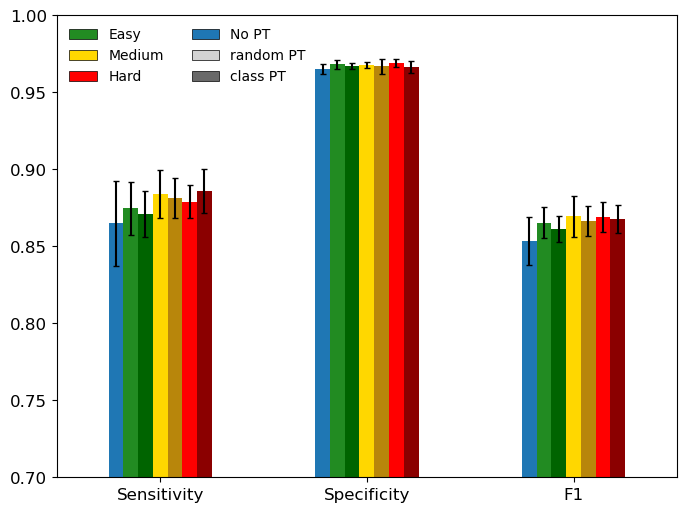

In [113]:
# plot_metrics(df_CV, metrics=metrics, train_params=train_params, ylim=(0.6, 1))
plot_metrics(df_CV, metrics=metrics, ylim=(0.7, 1), savepath='results/figures/report/random_FT_results.eps', figsize=(8, 6))

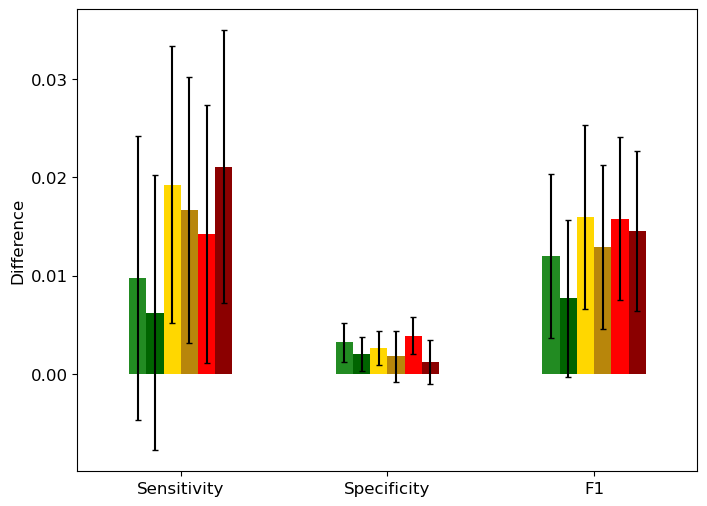

In [116]:
plot_rel_metric_diffs(df_diff, metrics=metrics, savepath='results/figures/report/random_FT_diffs.eps', figsize=(8, 6))

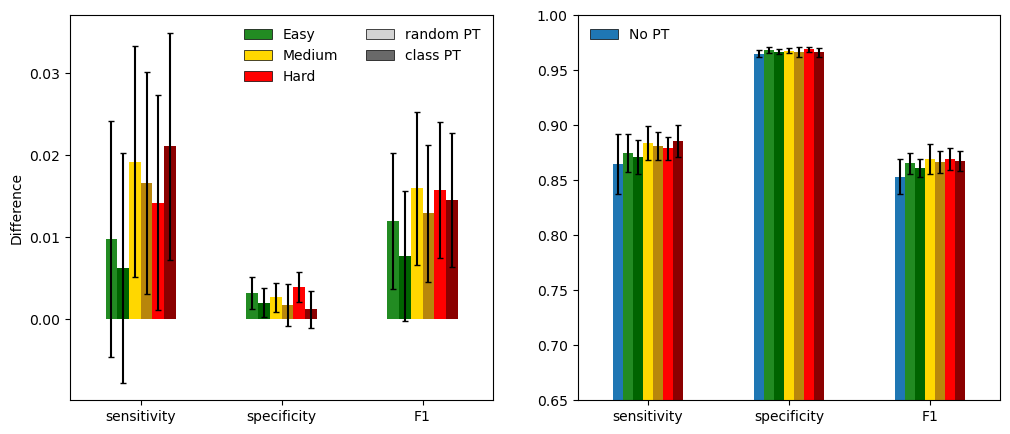

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
# ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+')')
ax1.set_xlabel('')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax1.legend(
    handles=[easyPT, mediumPT, hardPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
    loc='upper right',
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('')
# ax2.set_title('FT: p=('+train_params.replace('_', ', ')+')')
ax2.legend(
    handles=[noPT],
    labels=['No PT'],
    framealpha=0,
    loc='upper left',
)
savepath = 'results/figures/report/random_FT_diffs_and_results.eps'
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) 
plt.show()

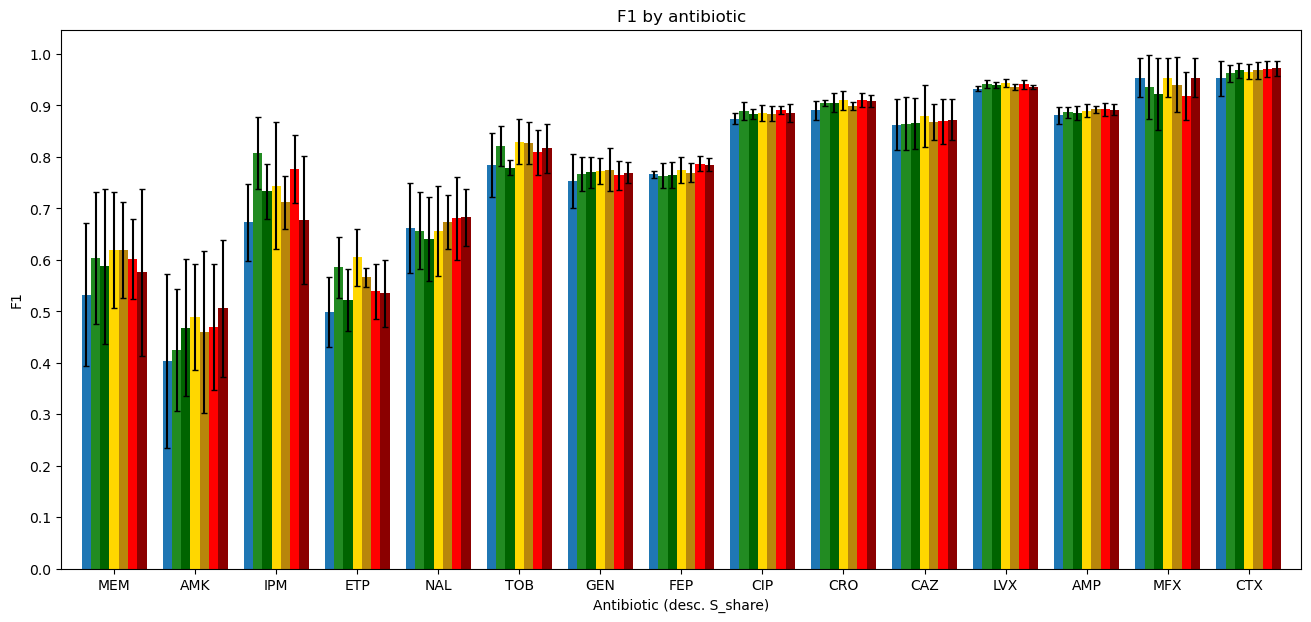

In [8]:
df_CV_ab = load_and_create_ab_df(train_params, exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

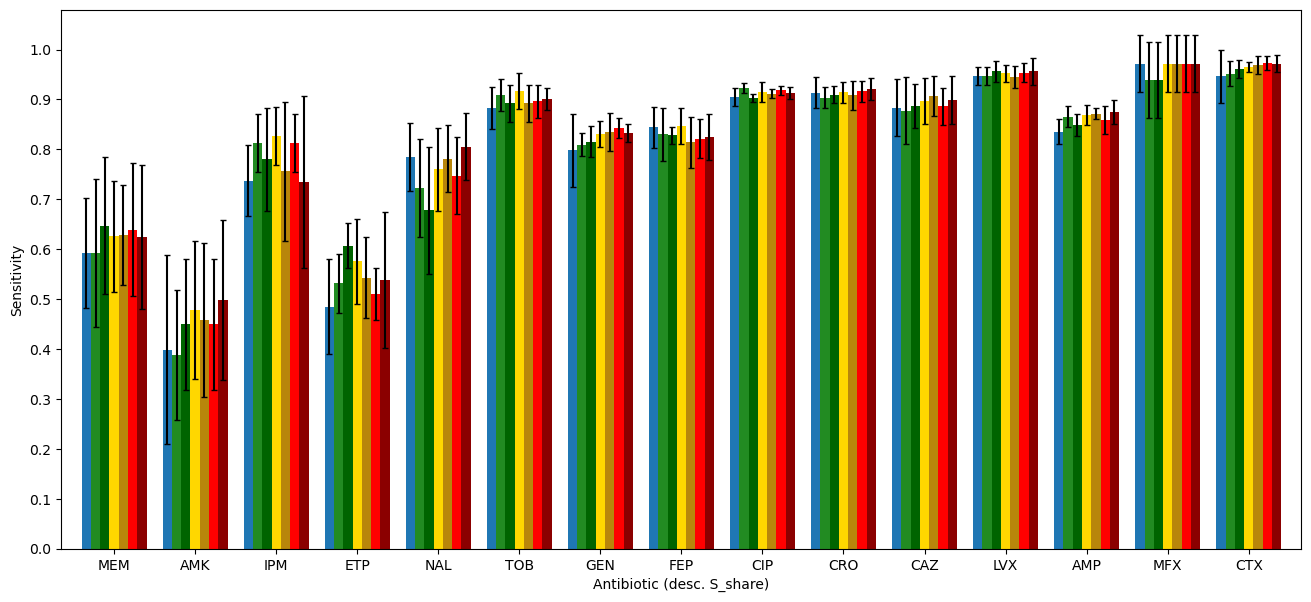

In [9]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    title='none',
    use_legend=False,
    savepath='results/figures/report/random_FT_sensitivity_by_ab.eps',
)

More difficult, unbalanced antibiotics

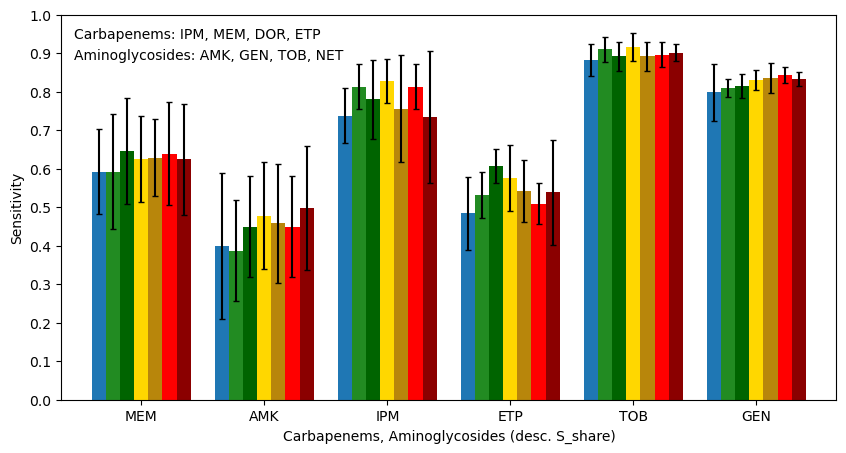

In [10]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(10,5),
    sort_by_desc='S_share',
    use_legend=False,
    classes_legend=True,
    legend_loc='upper left',
    title='none',
    select_ab_classes=['Carbapenems', 'Aminoglycosides']
)

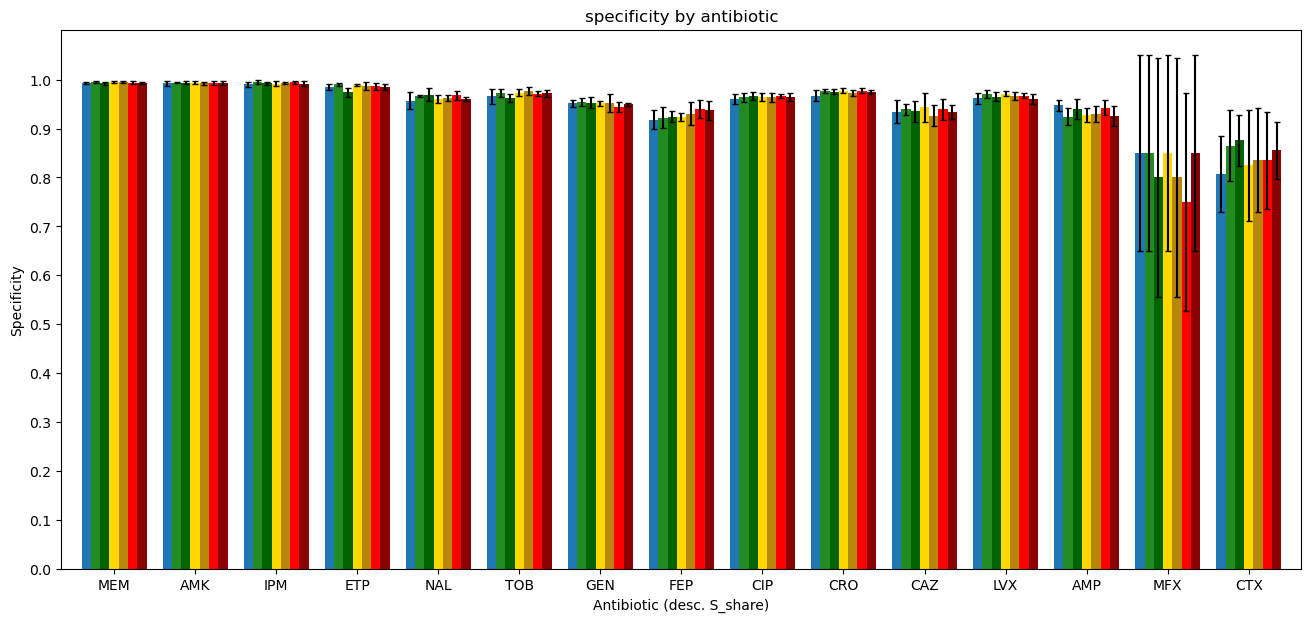

In [11]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

### Reduced training size

In [12]:
model_names = ['No PT', 'Easy RPT', 'Medium RPT', 'Hard RPT', 'Easy CPT', 'Medium CPT', 'Hard CPT']
train_shares = [1, 5, 10, 20, 30]
df_CV_list = [load_and_create_train_share_df(model_name, train_params, exp_folder=exp_folder, include_auc=False) for model_name in model_names]

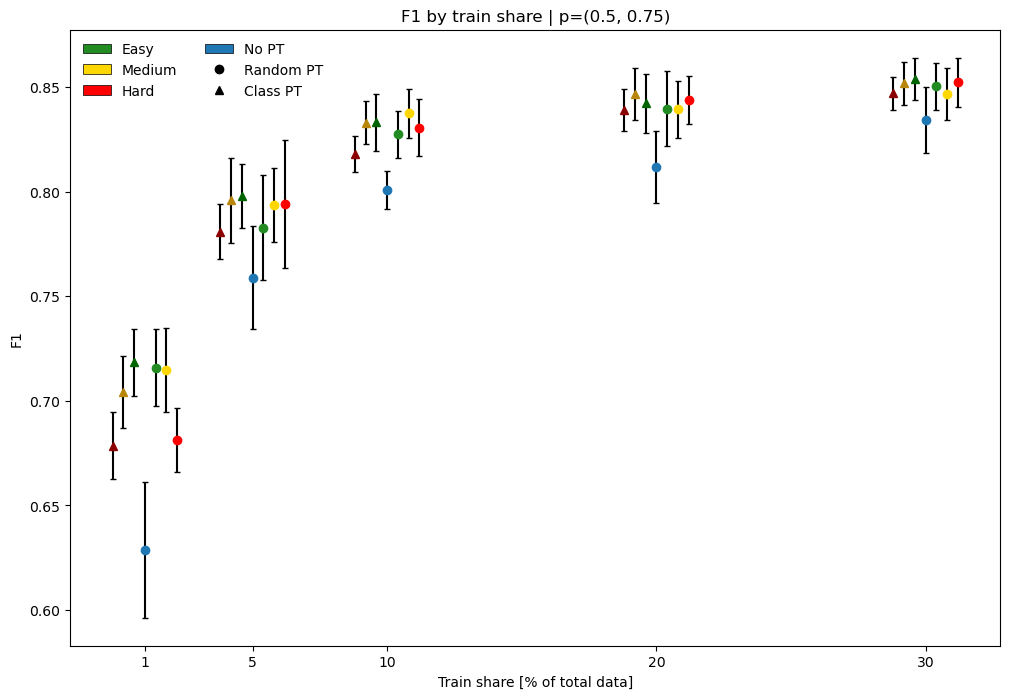

In [13]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'F1',
    plot_title='F1 by train share | p=('+train_params.replace('_', ', ')+')',
    savepath=None,
) 

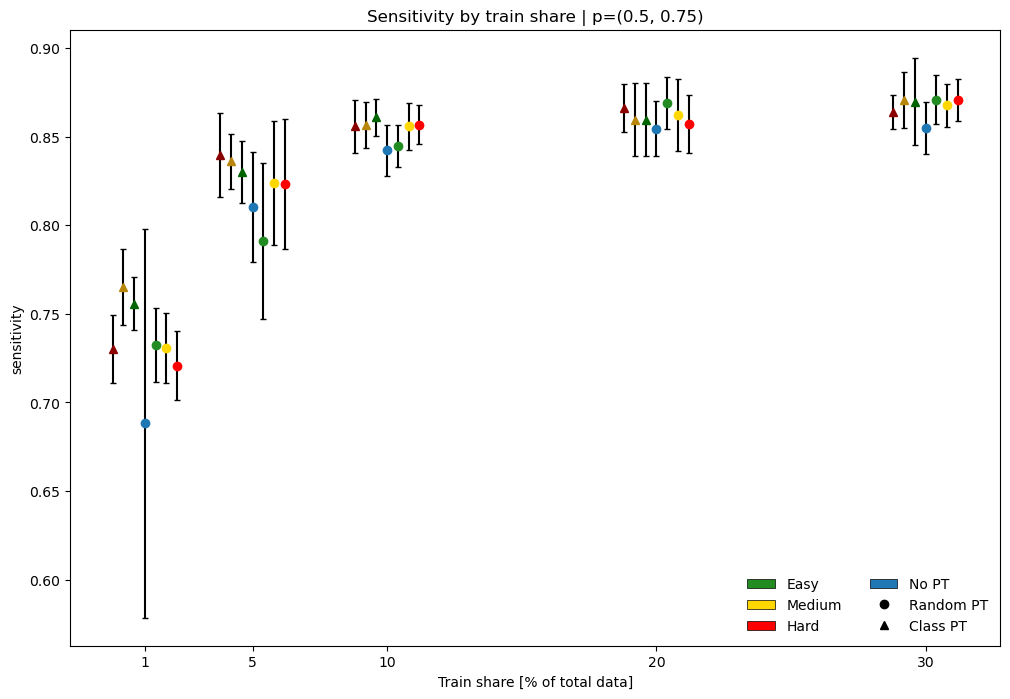

In [14]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'sensitivity',
    plot_title='Sensitivity by train share | p=('+train_params.replace('_', ', ')+')',
    savepath=None,
) 

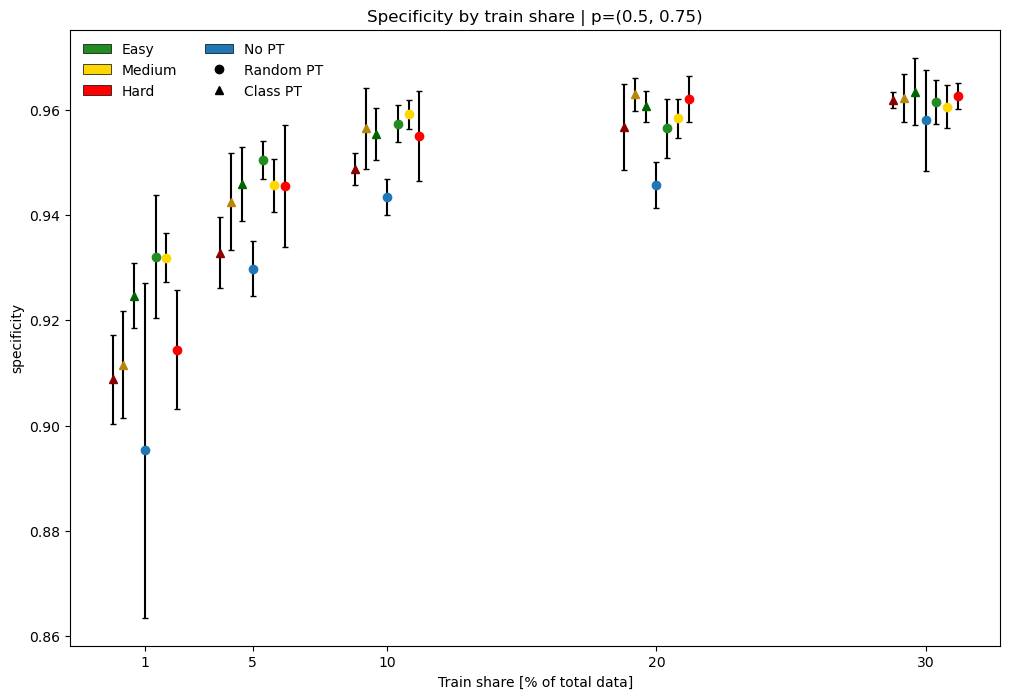

In [15]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'specificity',
    plot_title='Specificity by train share | p=('+train_params.replace('_', ', ')+')',
    savepath=None,
) 

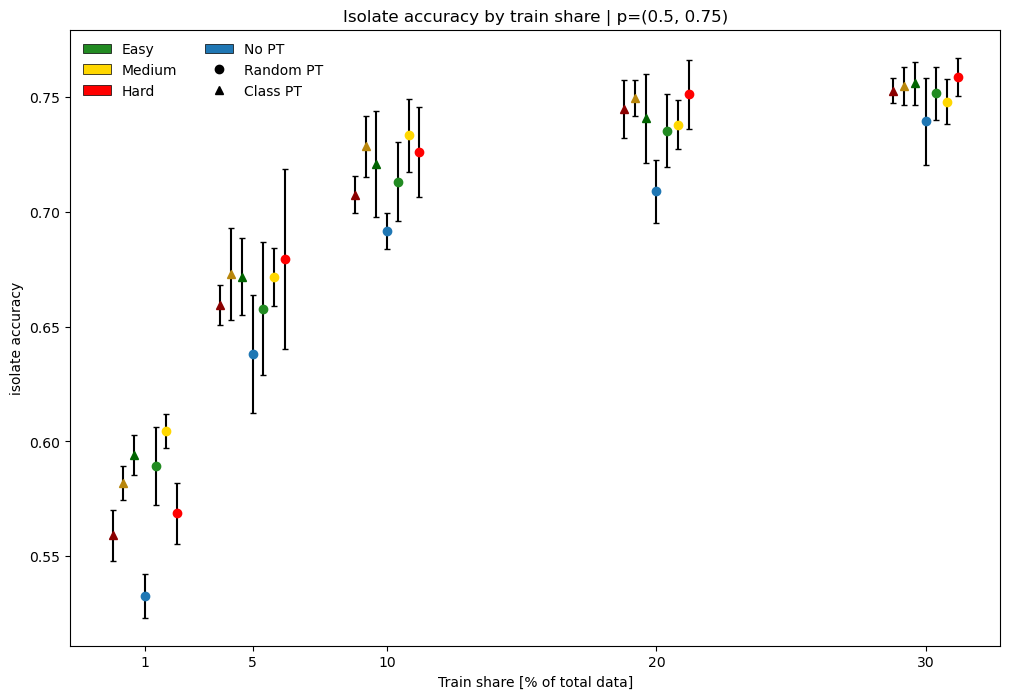

In [16]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'isolate accuracy',
    plot_title='Isolate accuracy by train share | p=('+train_params.replace('_', ', ')+')',
    savepath=None,
) 

#### In-depth plots at specific train shares

1%

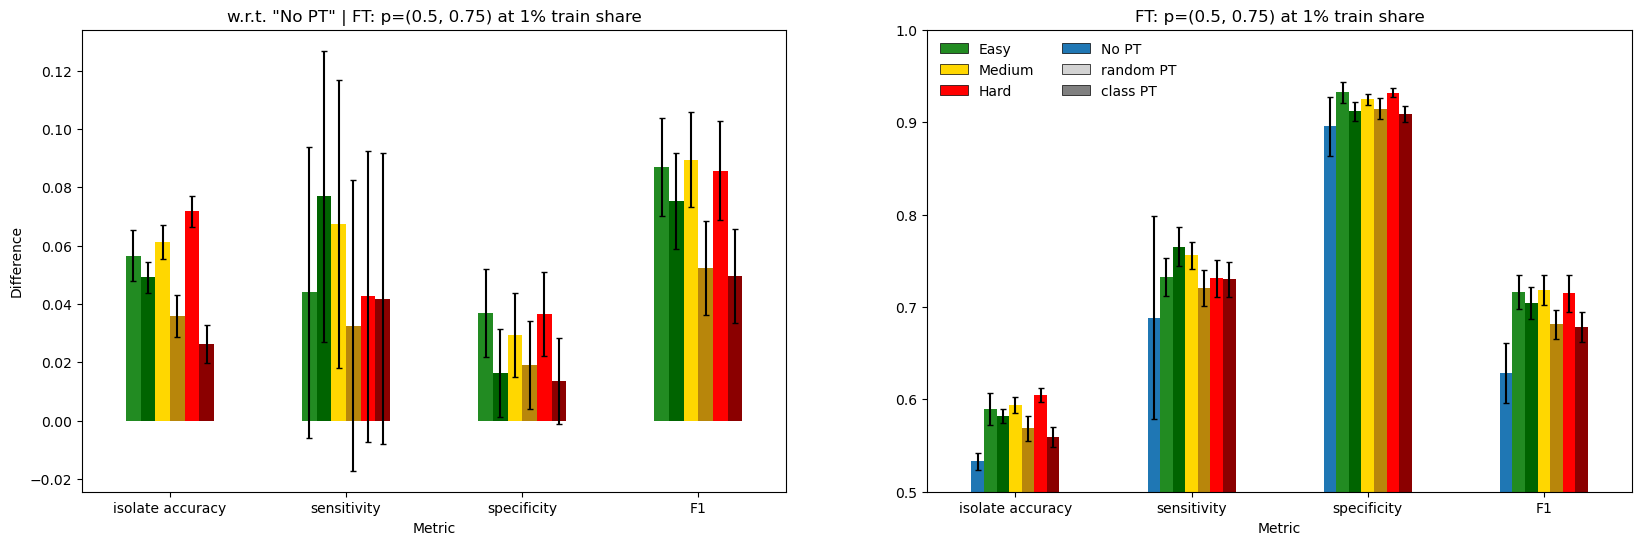

In [17]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.01', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 1% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 1% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.01.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()


c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:210: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:210: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:210: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\U

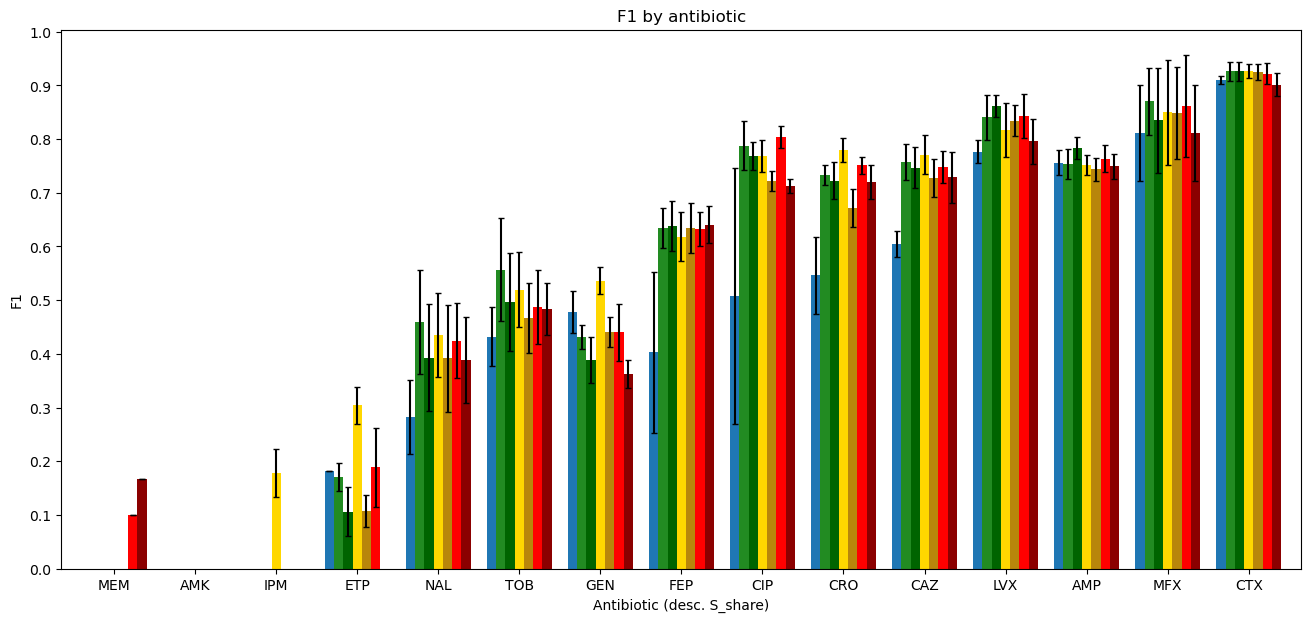

In [18]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.01', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
    savepath=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_F1_by_ab_0.01.eps') if save_results else None,
)

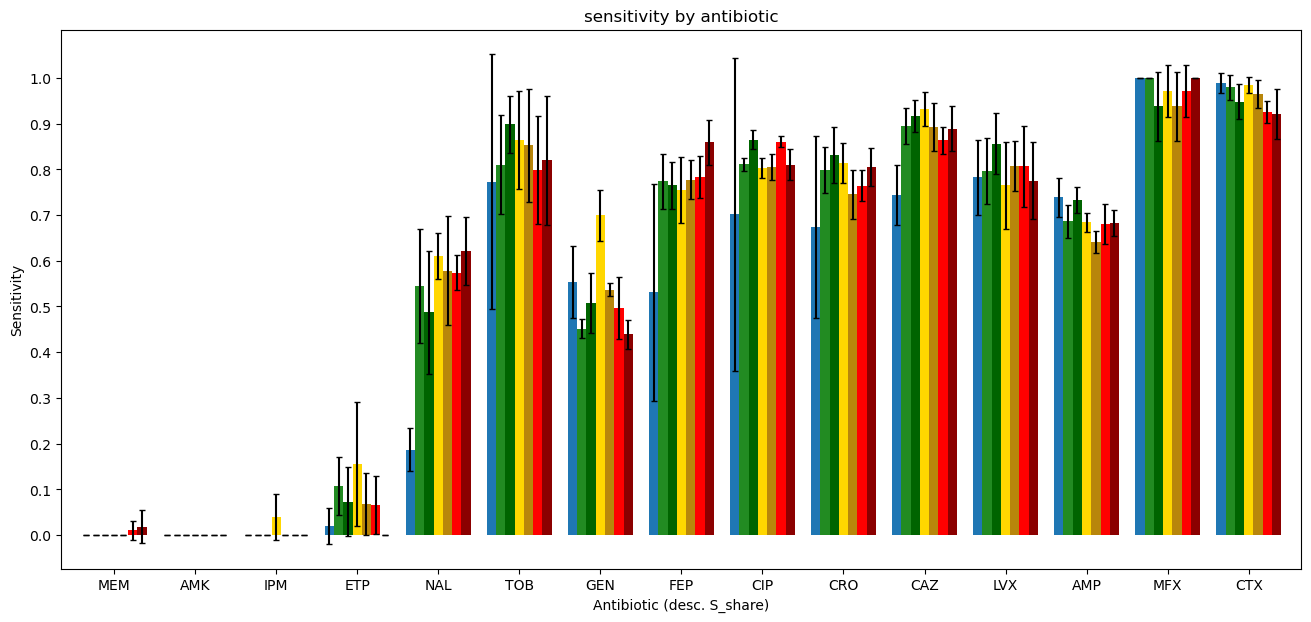

In [19]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

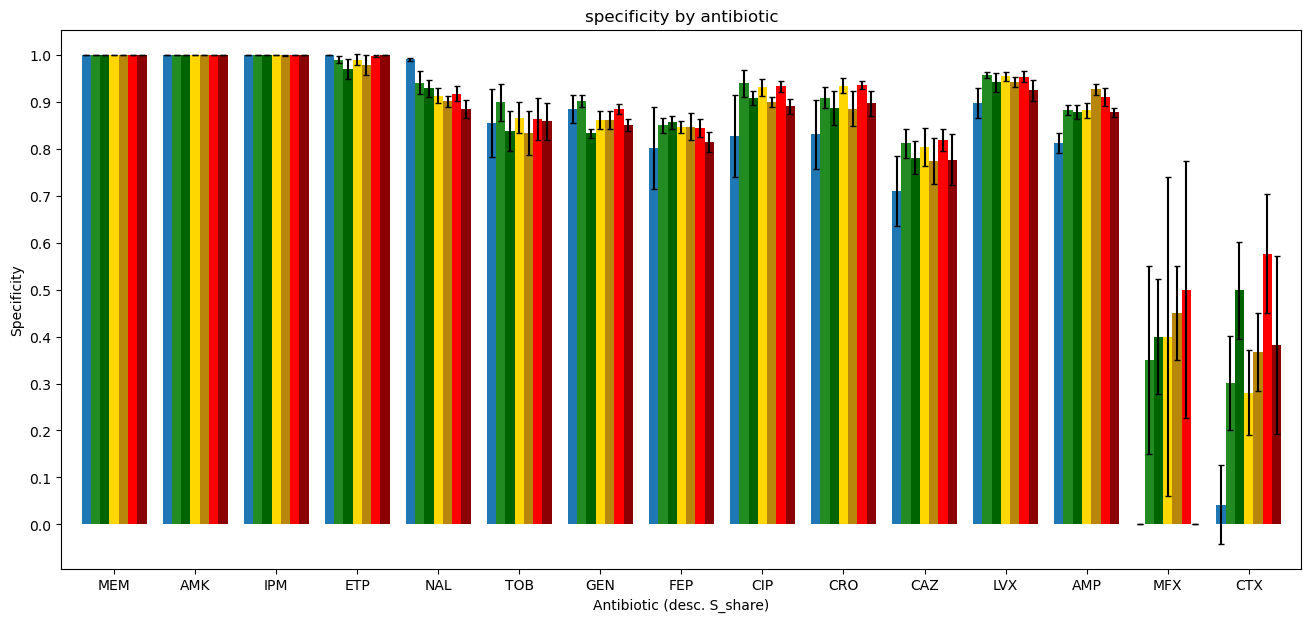

In [20]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

5%

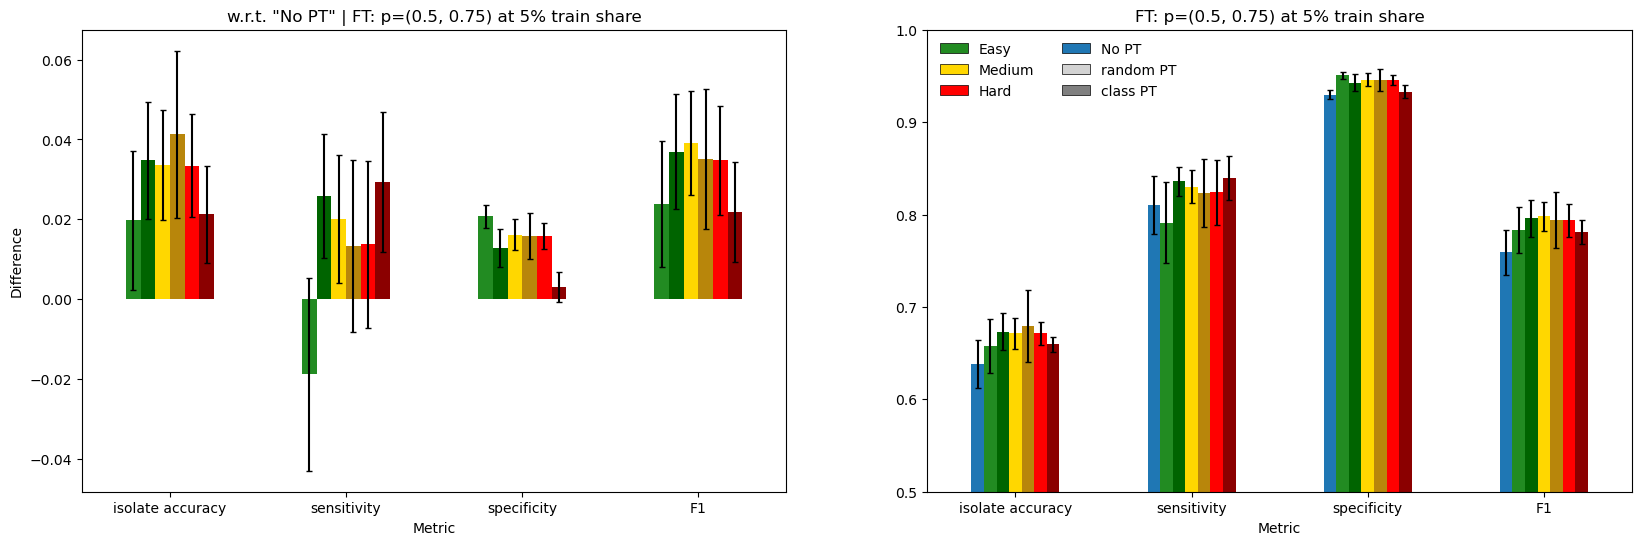

In [21]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.05', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 5% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 5% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.05.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

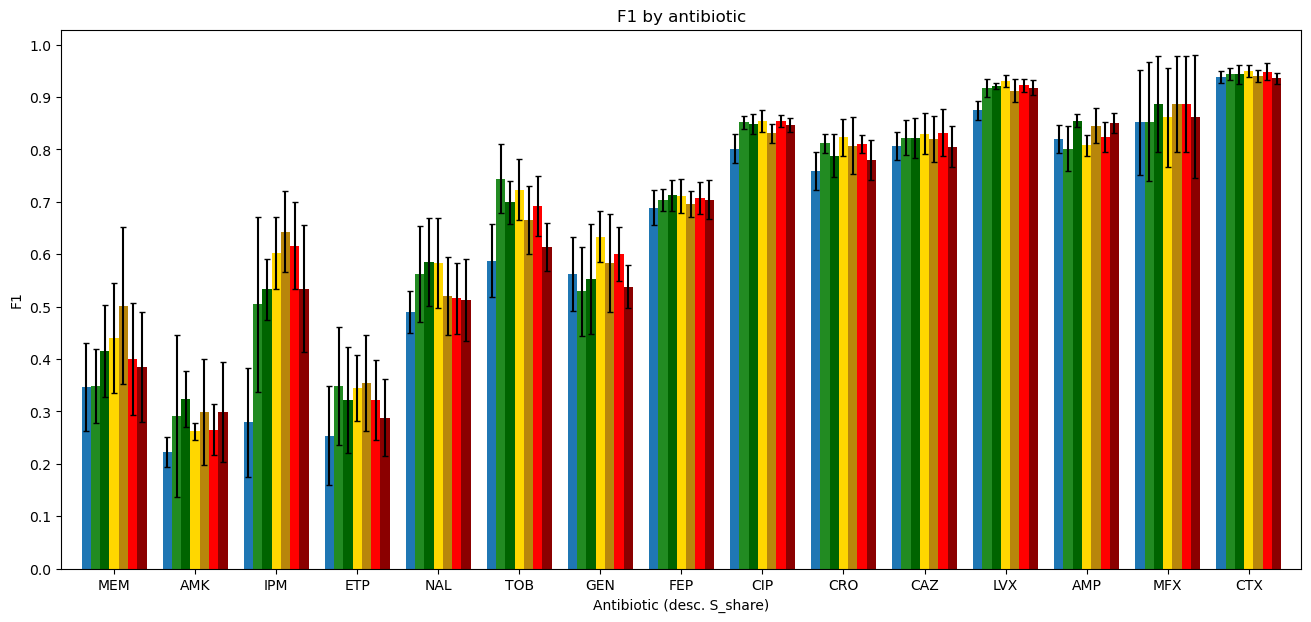

In [22]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.05', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

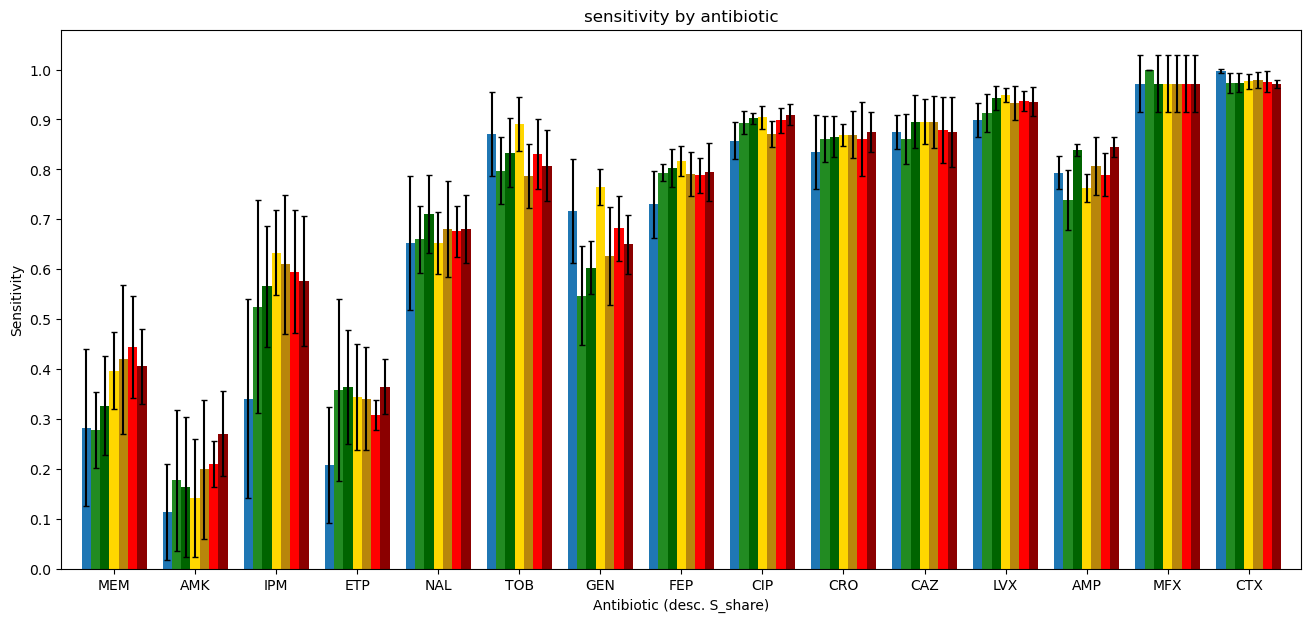

In [23]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

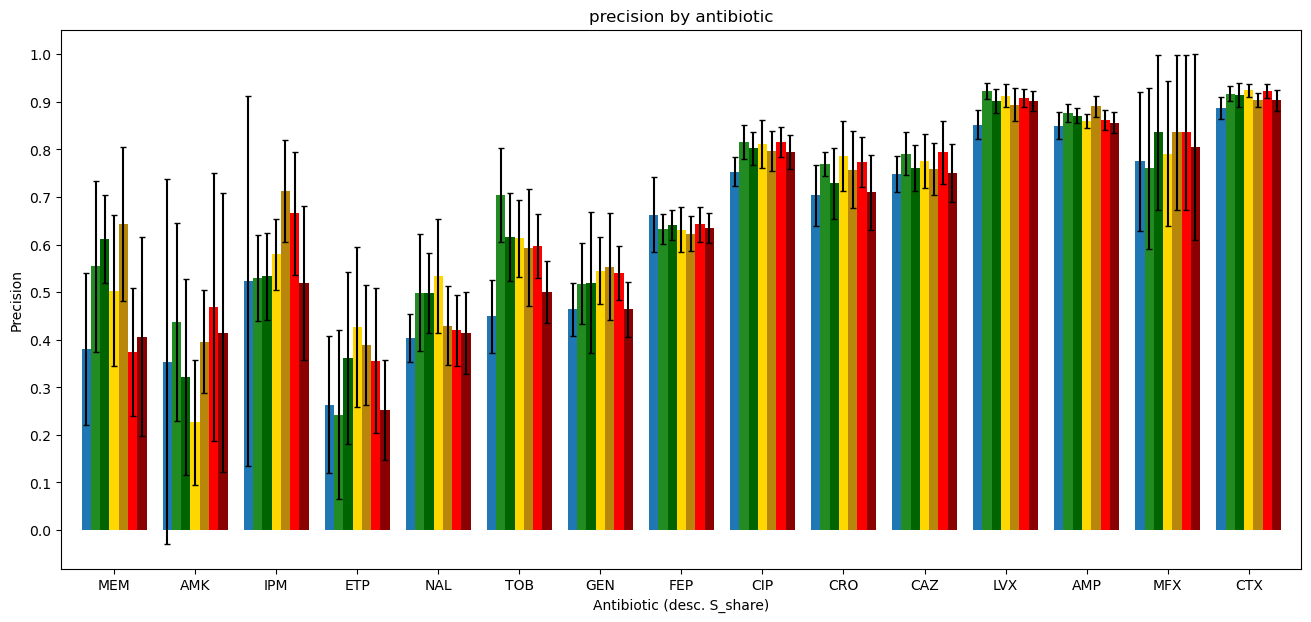

In [24]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

10%

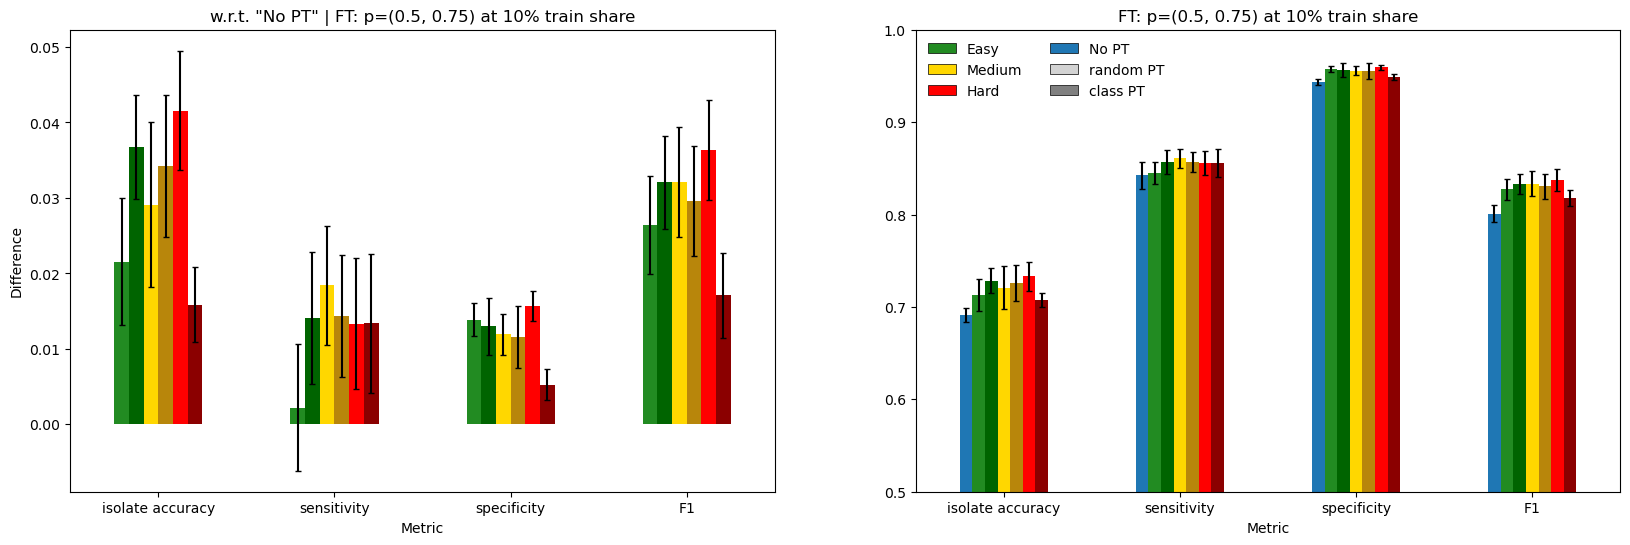

In [25]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.1', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

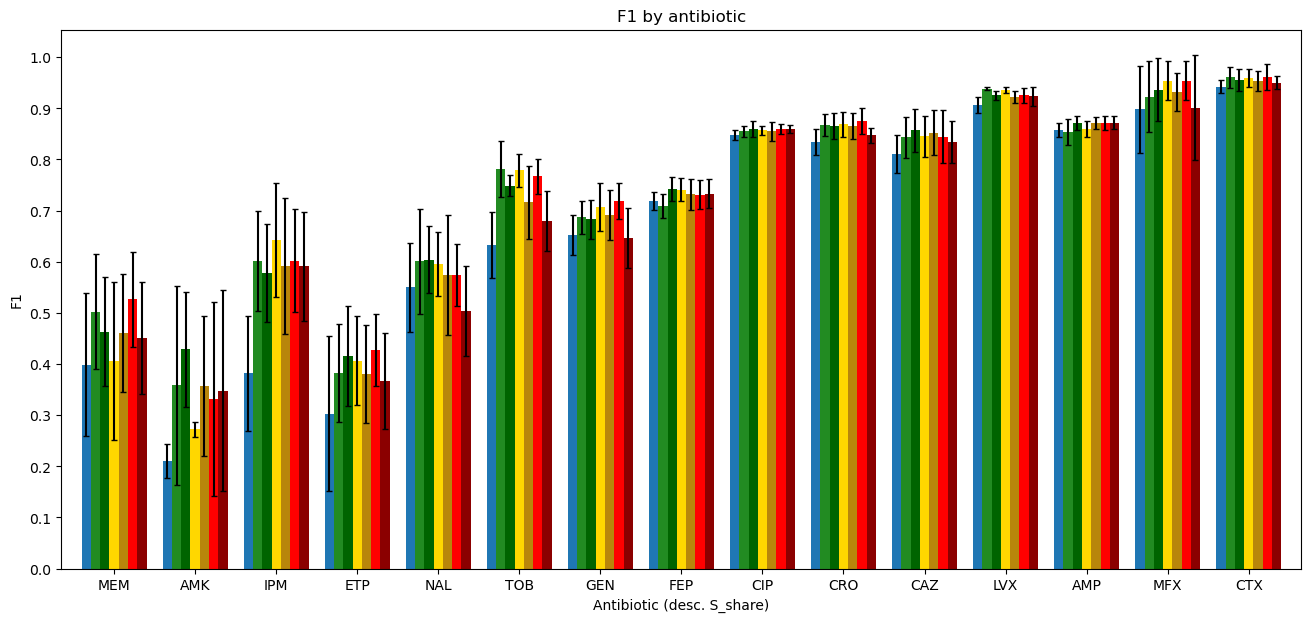

In [26]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.1', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

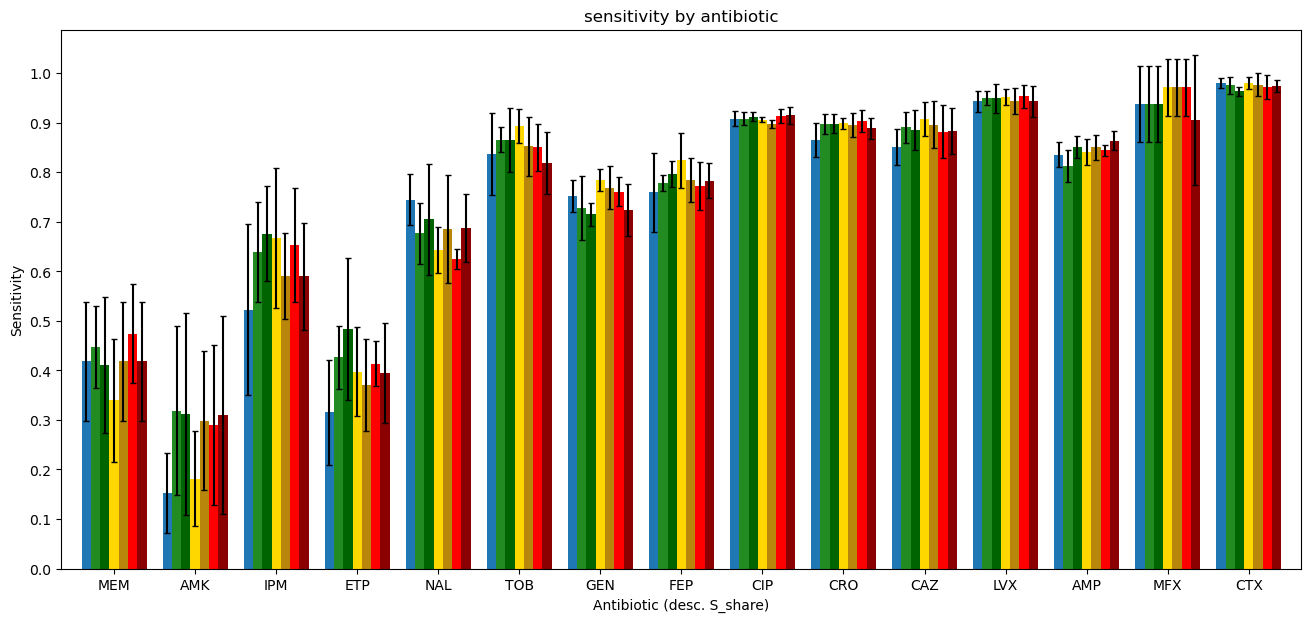

In [27]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

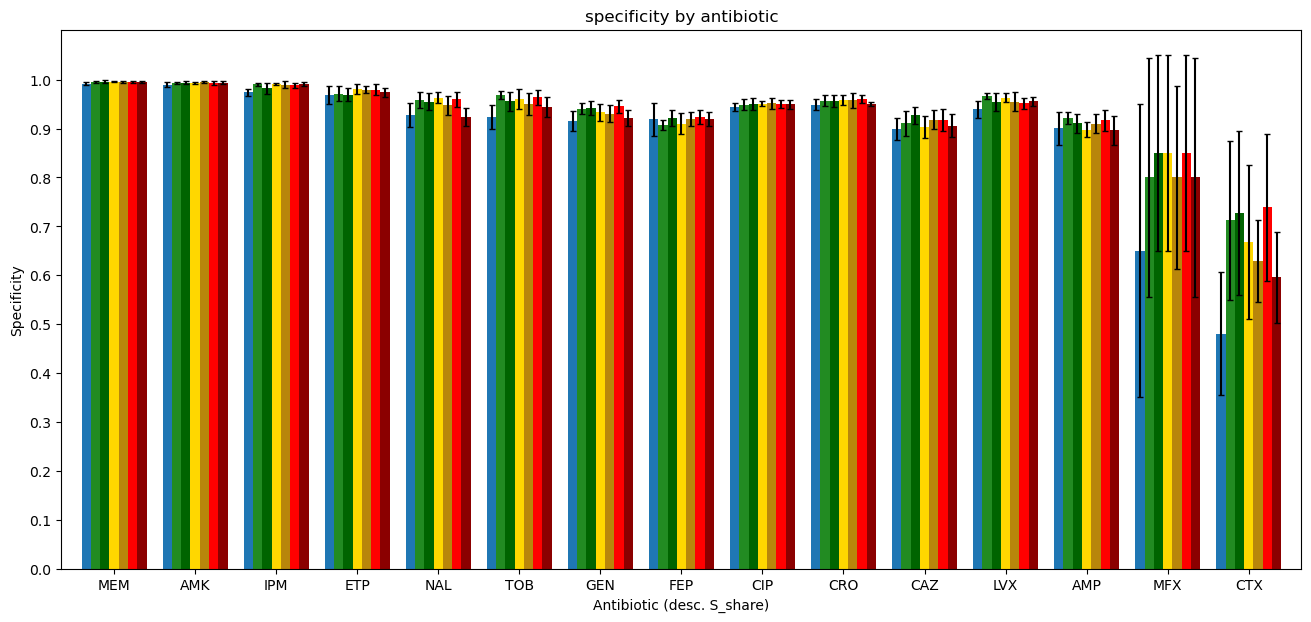

In [28]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

30%

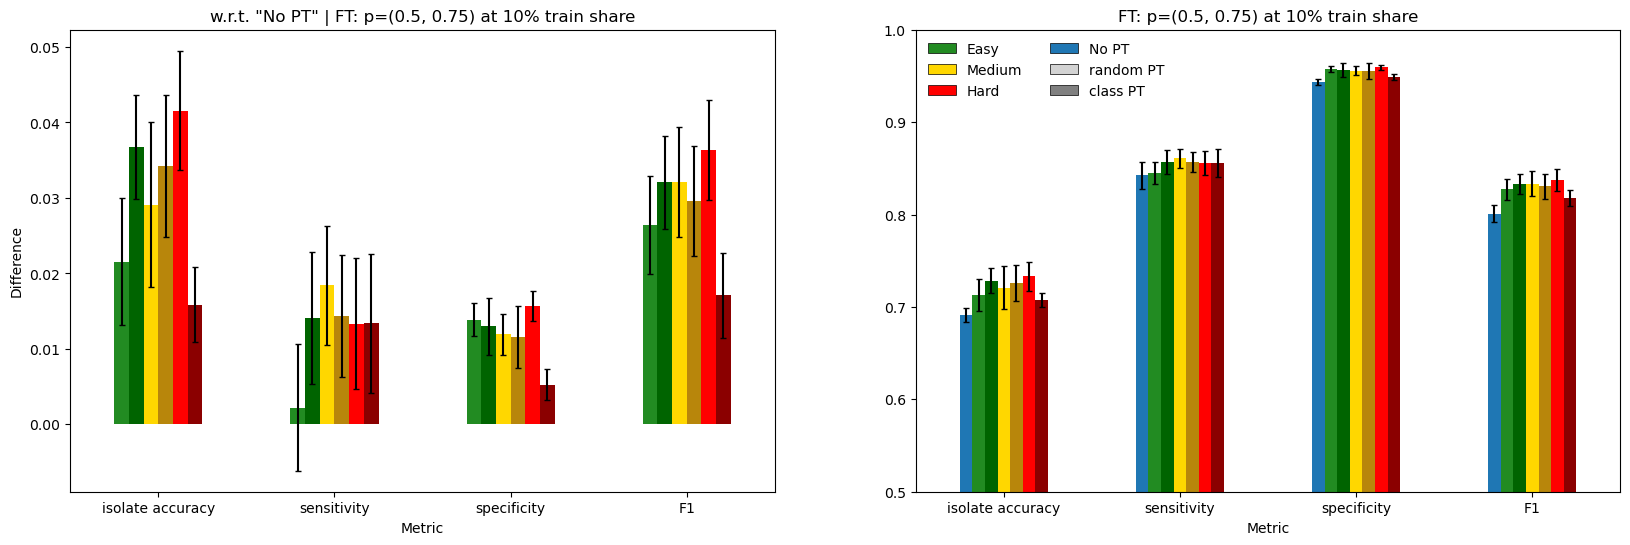

In [29]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.1', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

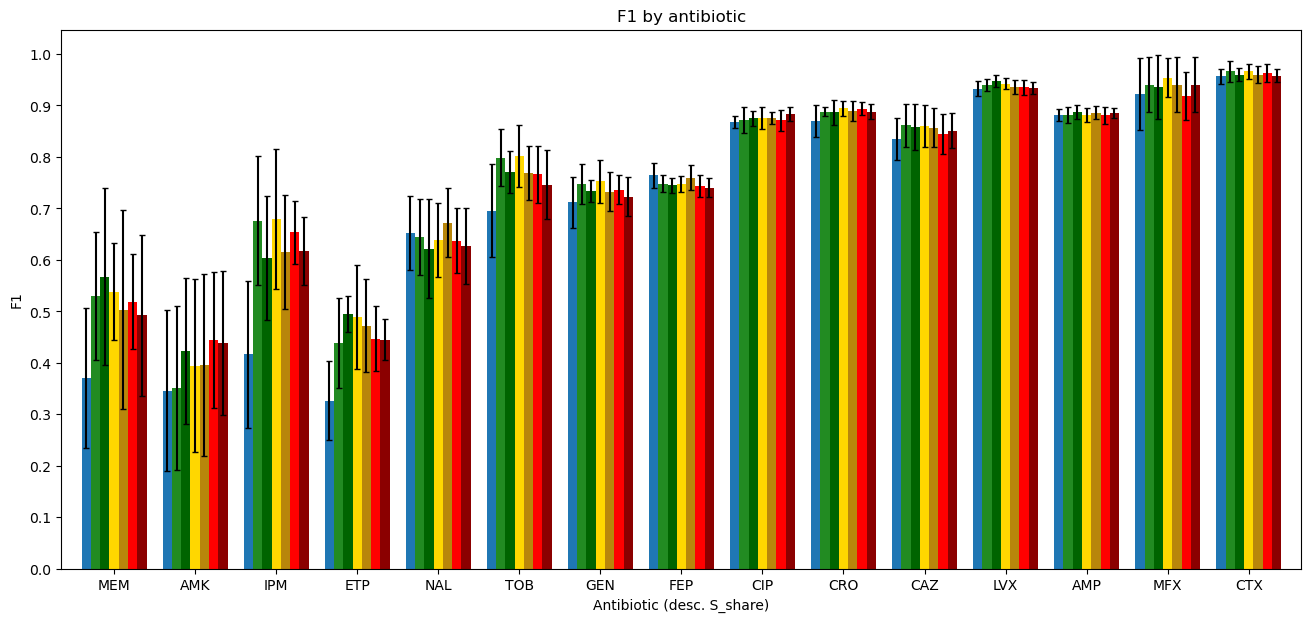

In [30]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.3', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

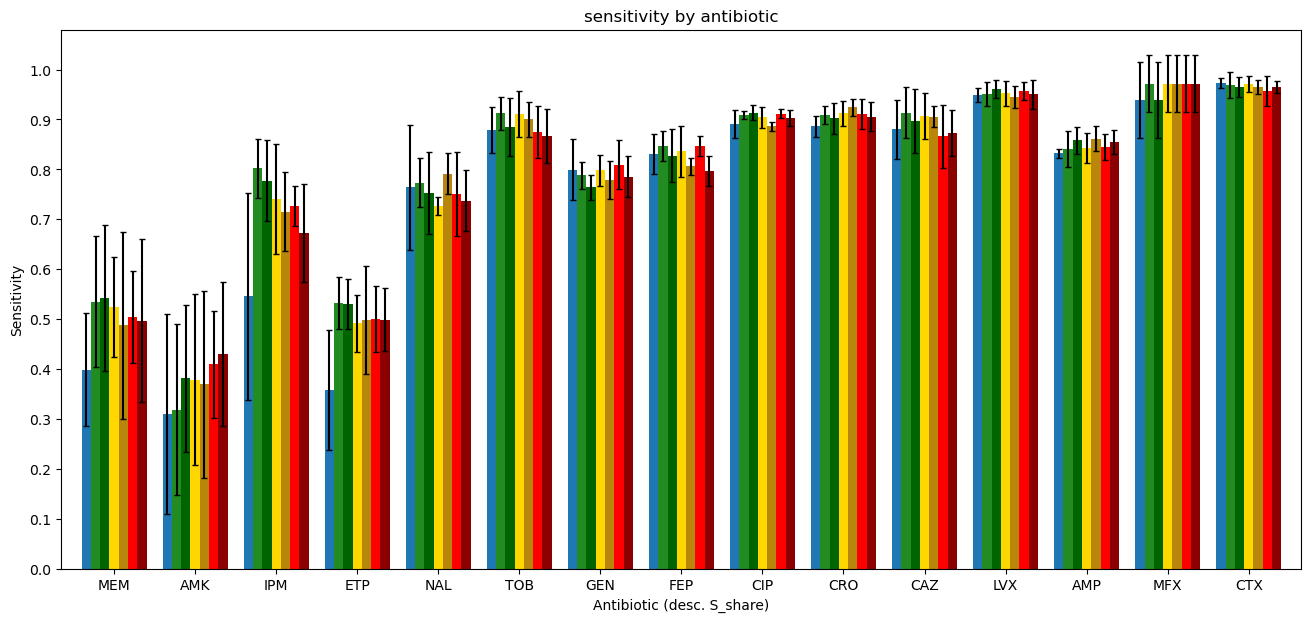

In [31]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

## p = (0.5, 1 class)

In [32]:
save_results = False
exp_folder = '2024-04-30_class'
train_params = '0.5_1class'
ab_figsize = (16, 7)
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, exp_folder=exp_folder, include_auc=False)

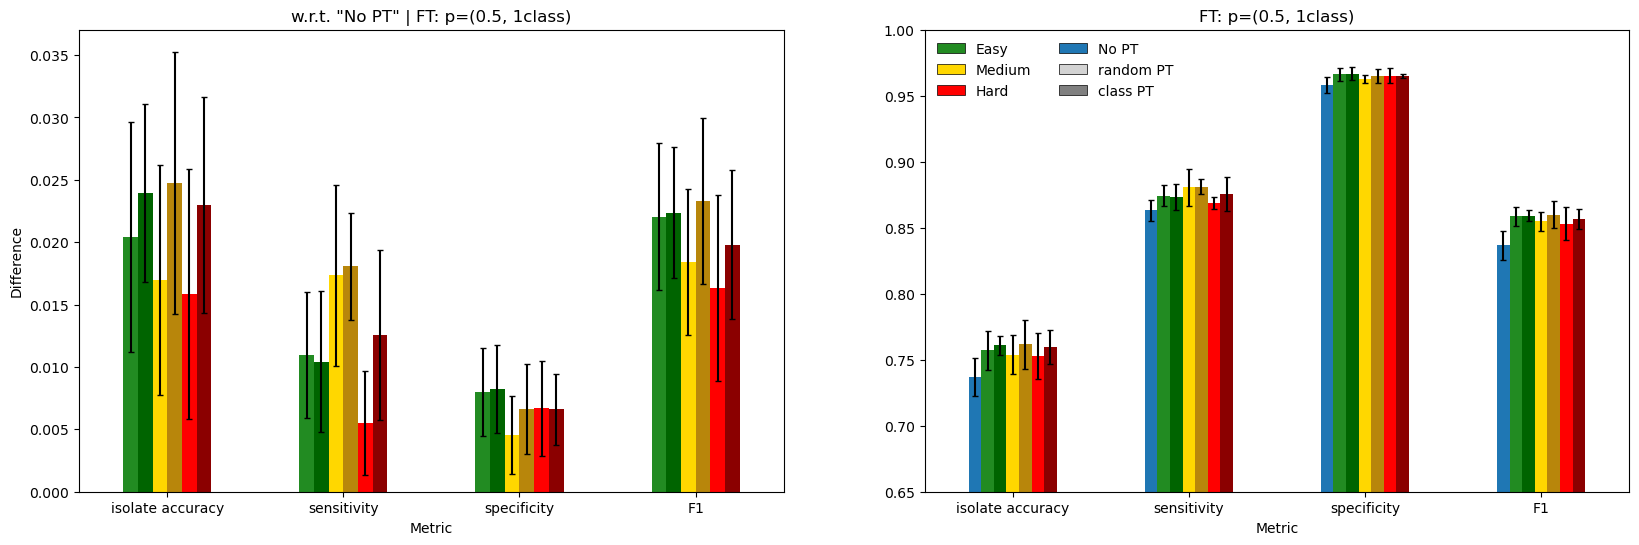

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+')')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.65, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+')')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', train_params+'FT_diff.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

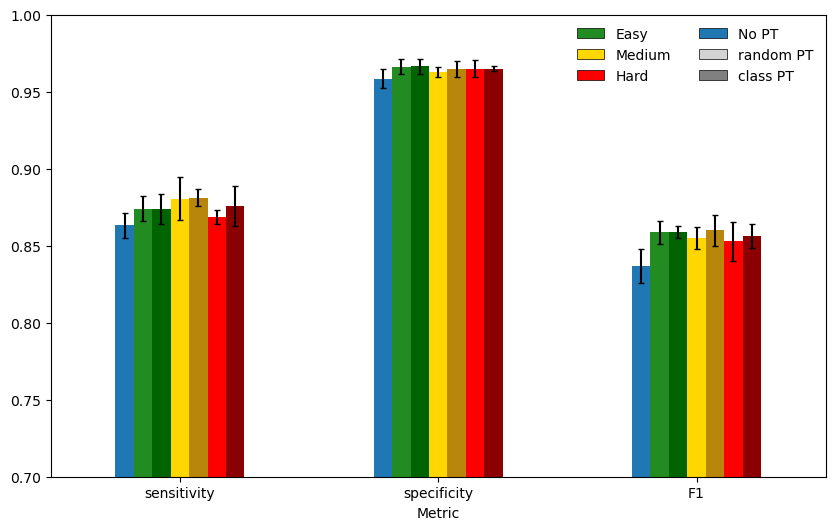

In [34]:
plot_metrics(df_CV, metrics=metrics, ylim=(0.7, 1), savepath='results/figures/report/class_FT_results.eps')

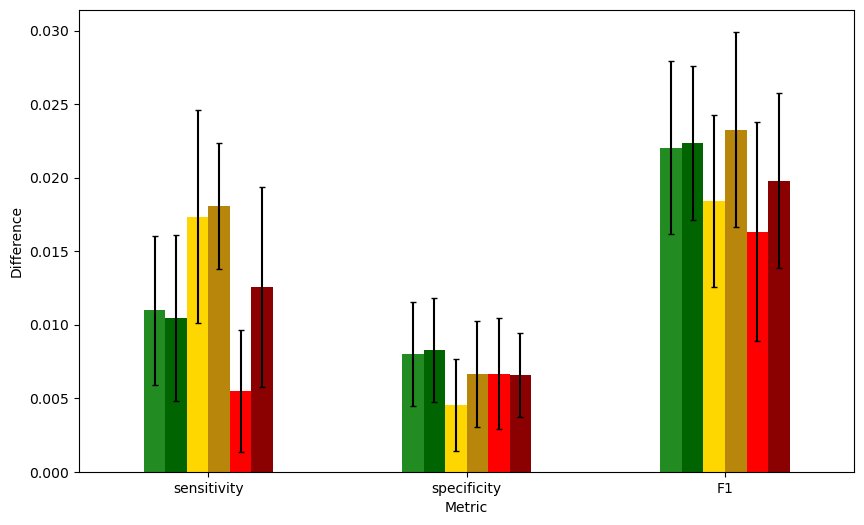

In [35]:
plot_rel_metric_diffs(df_diff, metrics=metrics, savepath='results/figures/report/class_FT_diffs.eps')

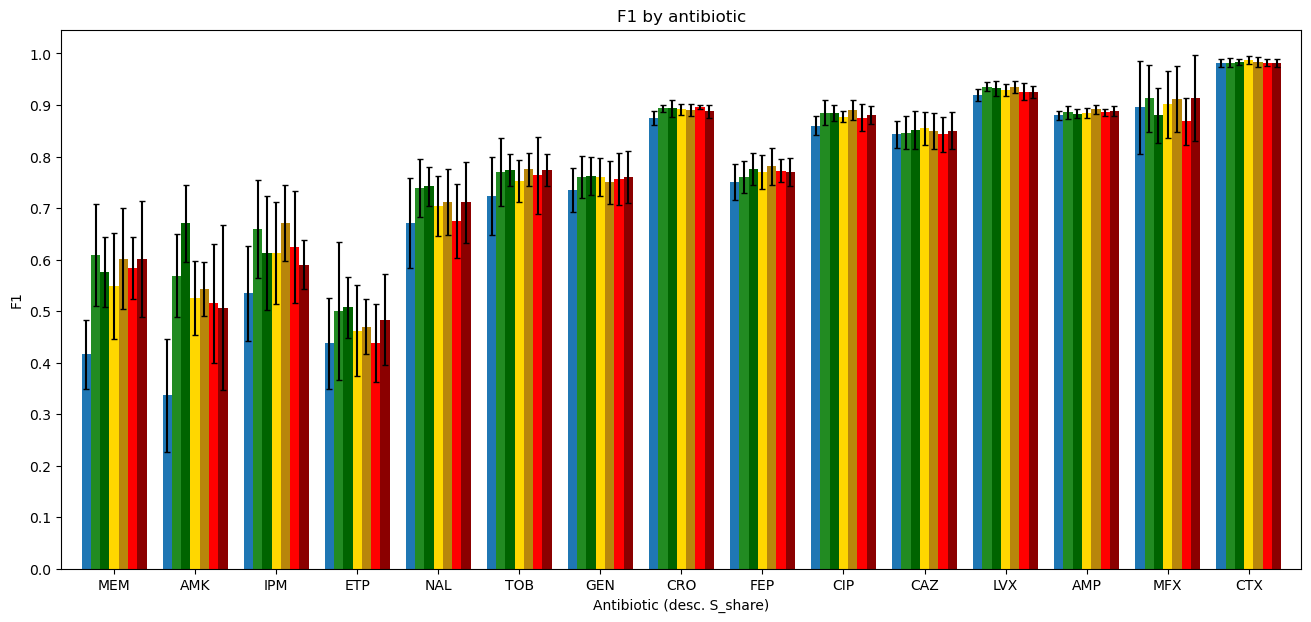

In [36]:
df_CV_ab = load_and_create_ab_df(train_params, exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

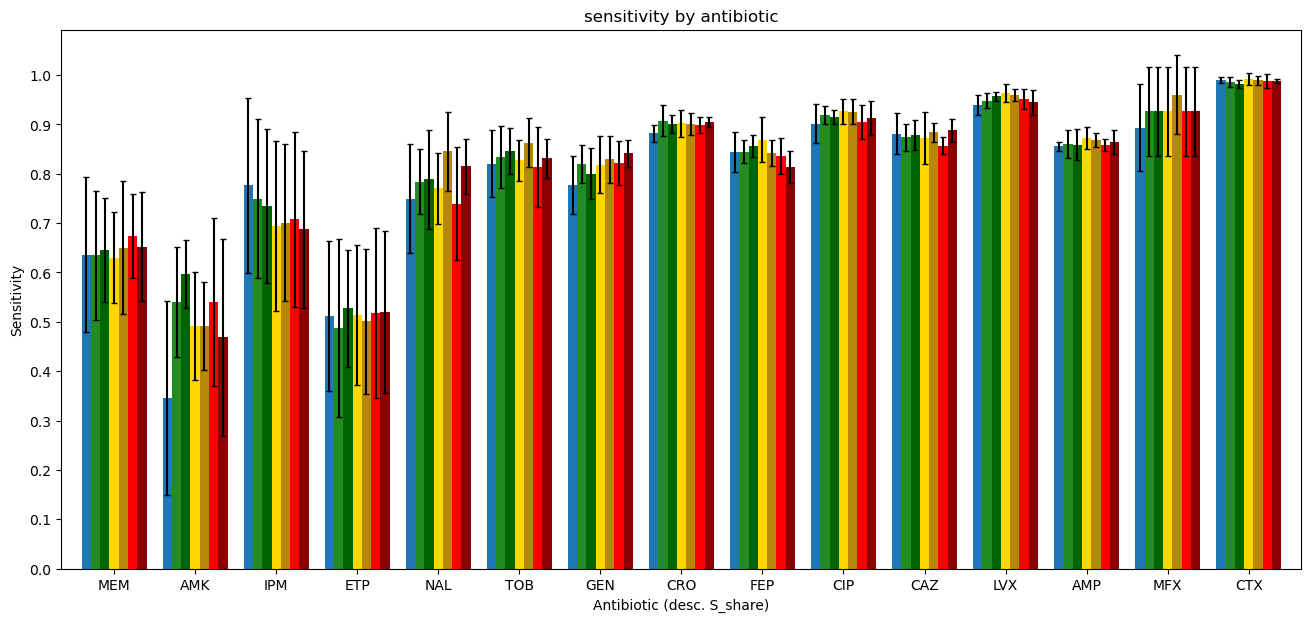

In [37]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
    savepath='results/figures/report/class_FT_sensitivity_by_ab.eps',
)

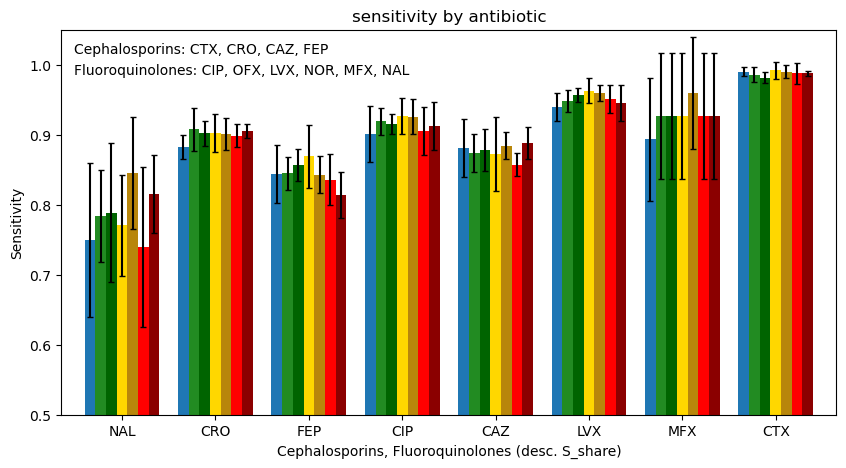

In [38]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(10,5),
    sort_by_desc='S_share',
    use_legend=False,
    select_ab_classes=['Cephalosporins', 'Fluoroquinolones'],
    classes_legend=True,
    ylim=(0.5, 1.05),
)

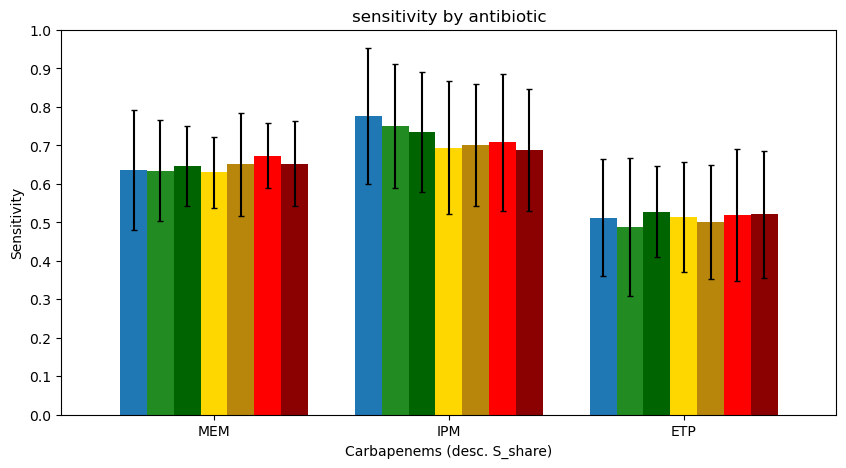

In [39]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=(10,5),
    sort_by_desc='S_share',
    use_legend=False,
    select_ab_classes=['Carbapenems'],
)

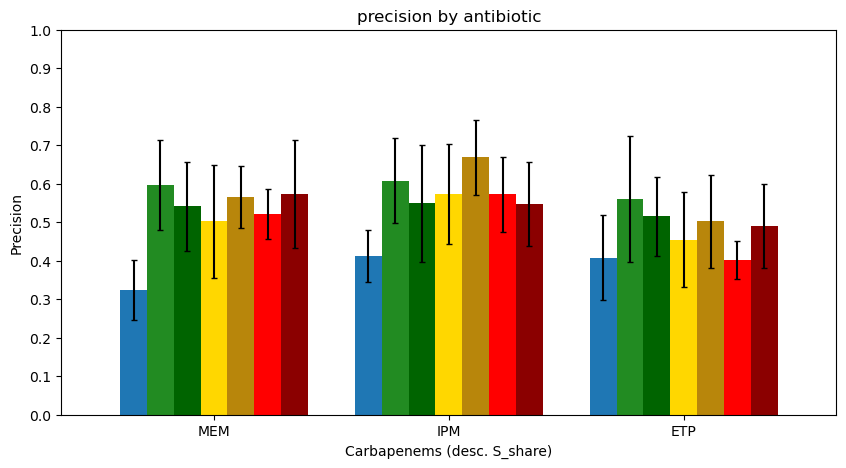

In [40]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=(10,5),
    sort_by_desc='S_share',
    use_legend=False,
    select_ab_classes=['Carbapenems'],
)

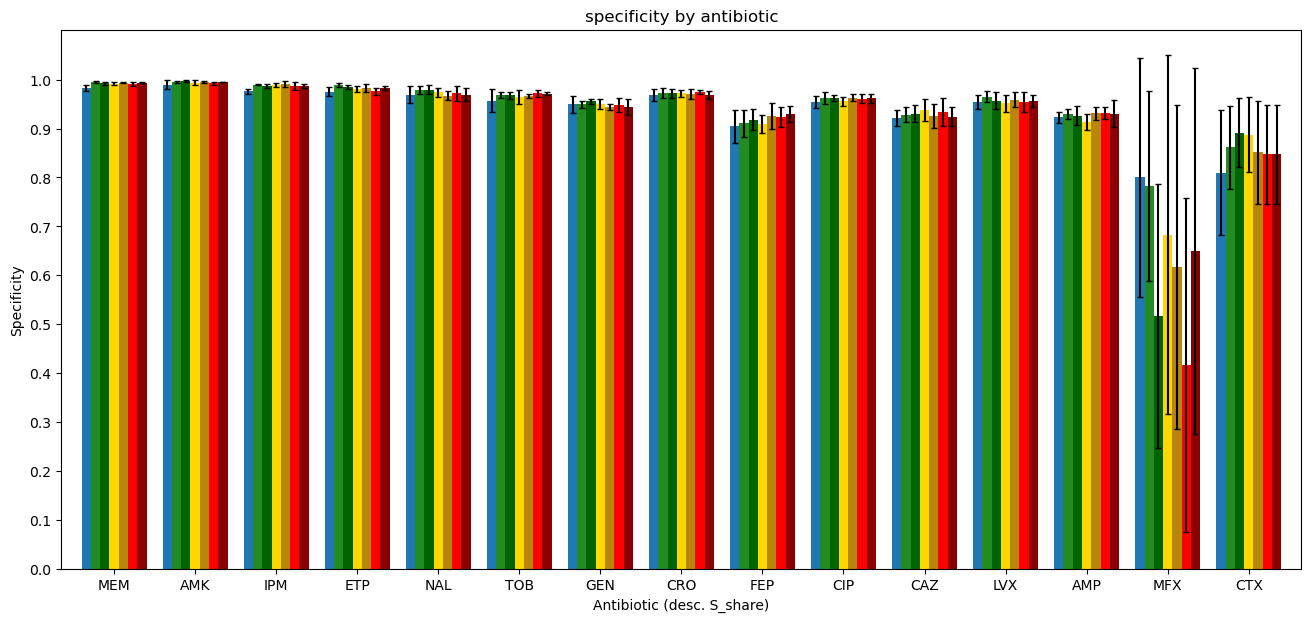

In [41]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

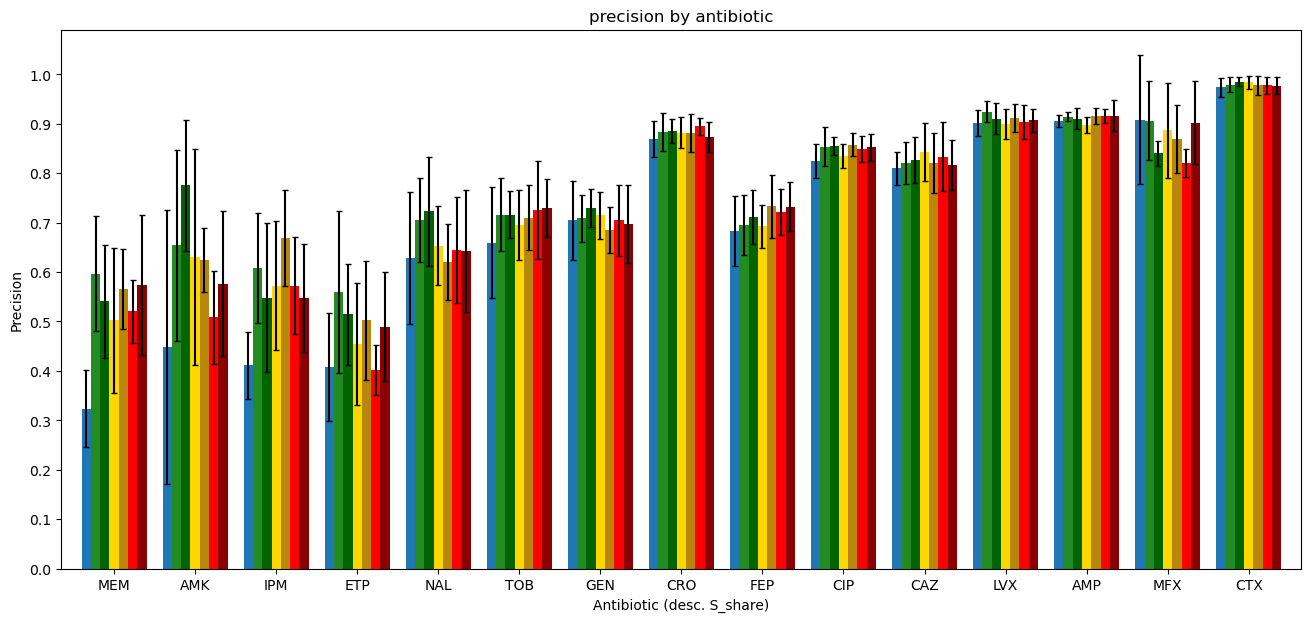

In [42]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

### Reduced training size

In [43]:
model_names = ['No PT', 'Easy RPT', 'Medium RPT', 'Hard RPT', 'Easy CPT', 'Medium CPT', 'Hard CPT']
train_shares = [1, 5, 10, 20, 30]
df_CV_list = [load_and_create_train_share_df(model_name, train_params, exp_folder=exp_folder, include_auc=False) for model_name in model_names]

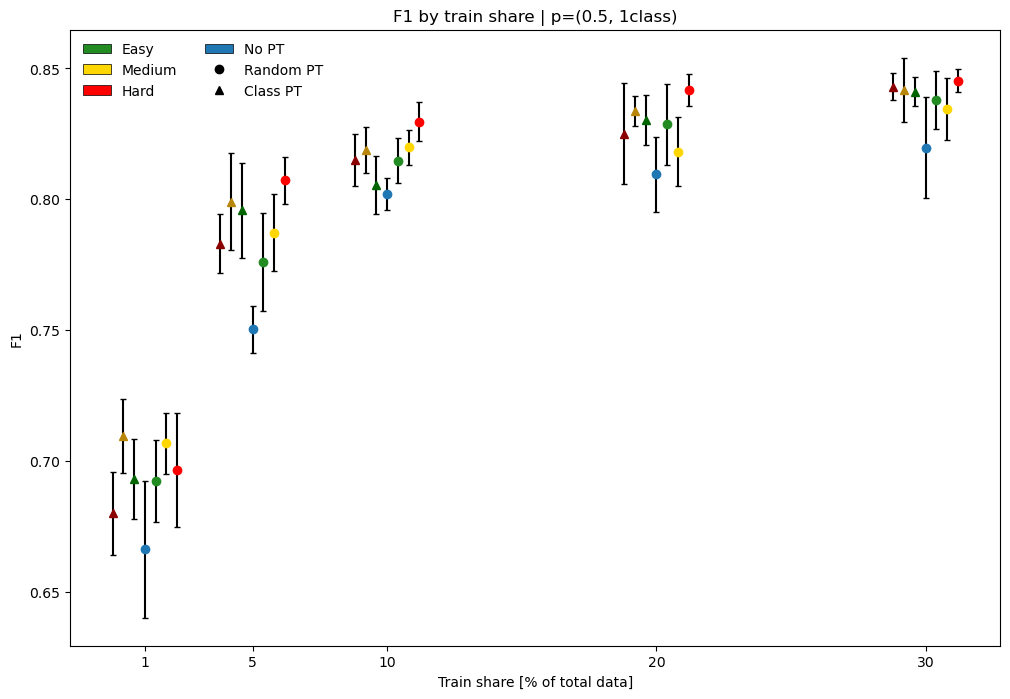

In [44]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'F1',
    plot_title='F1 by train share | p=('+train_params.replace('_', ', ')+')',
    savepath=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'F1_by_train_share_'+train_params+'.eps') if save_results else None,
) 

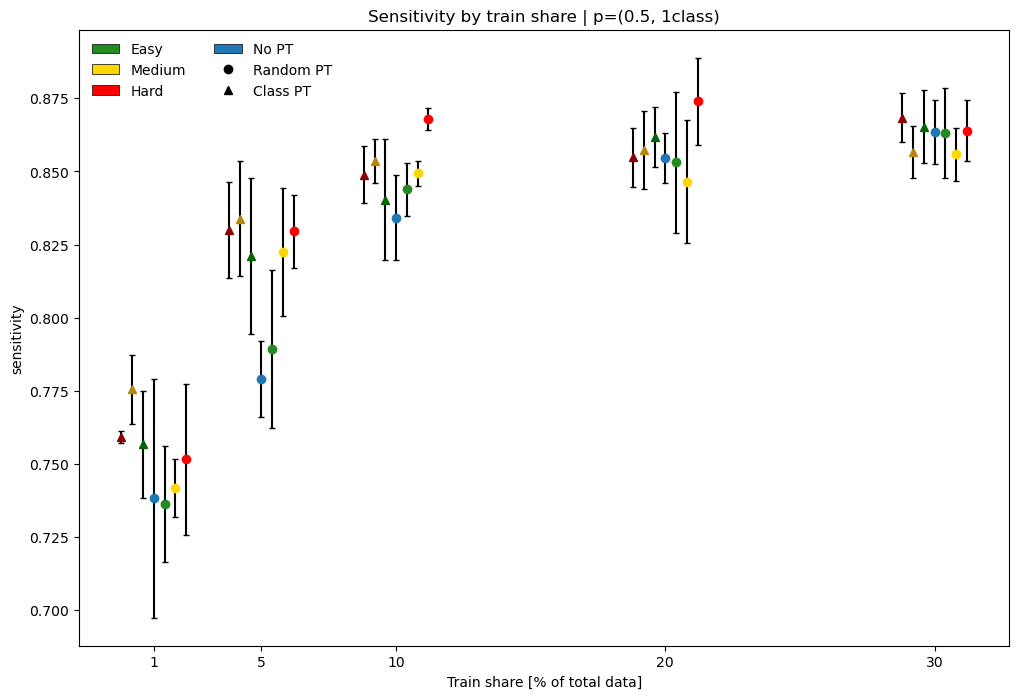

In [45]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'sensitivity',
    plot_title='Sensitivity by train share | p=('+train_params.replace('_', ', ')+')',
    savepath=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'sens_by_train_share_'+train_params+'.eps') if save_results else None,
) 

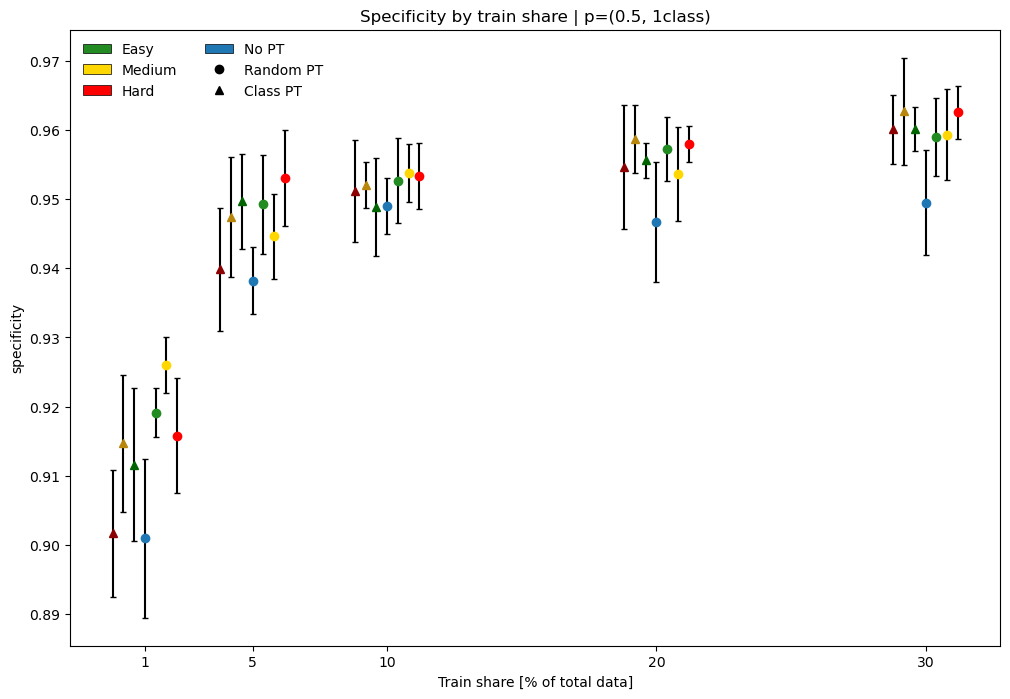

In [46]:
plot_metric_vs_train_shares(
    train_shares, 
    df_CV_list, 
    'specificity',
    plot_title='Specificity by train share | p=('+train_params.replace('_', ', ')+')',
    savepath=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'spec_by_train_share_'+train_params+'.eps') if save_results else None,
) 

#### In-depth plots at specific train shares

1%

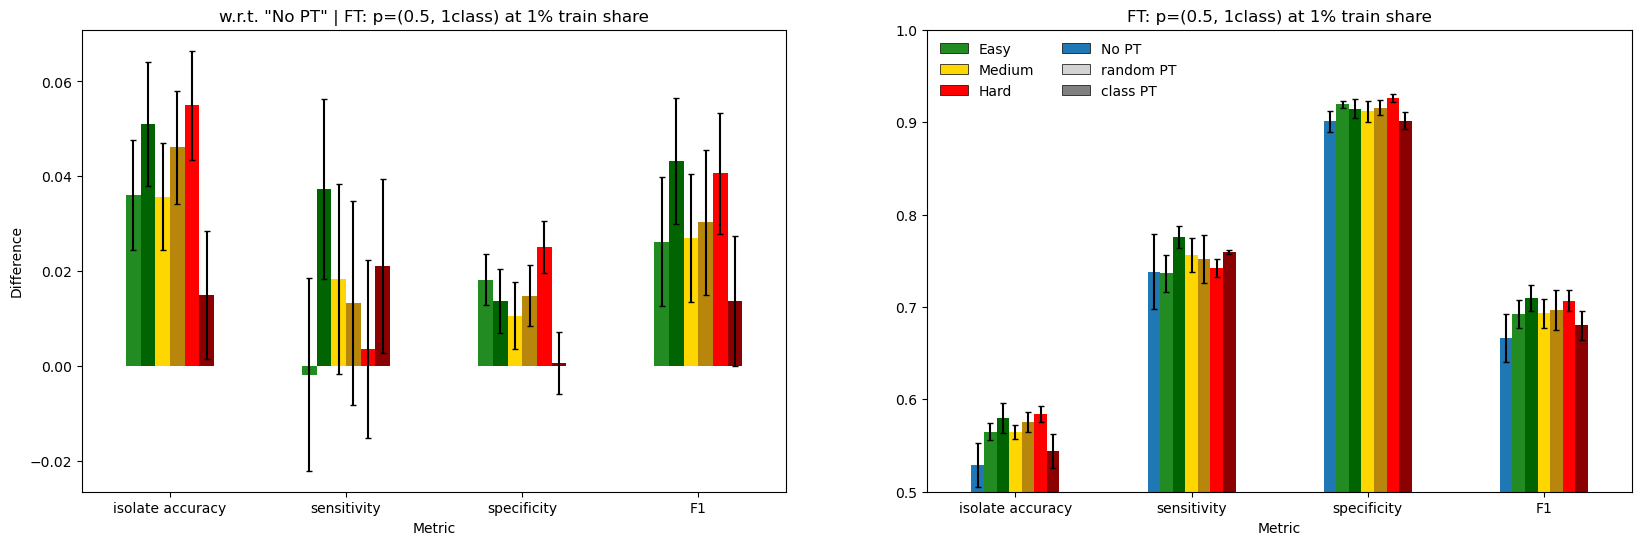

In [47]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.01', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 1% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 1% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.01.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:210: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:210: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\jespe\Documents\GitHub_local\ARFusion\utils.py:210: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr, axis=0)
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\U

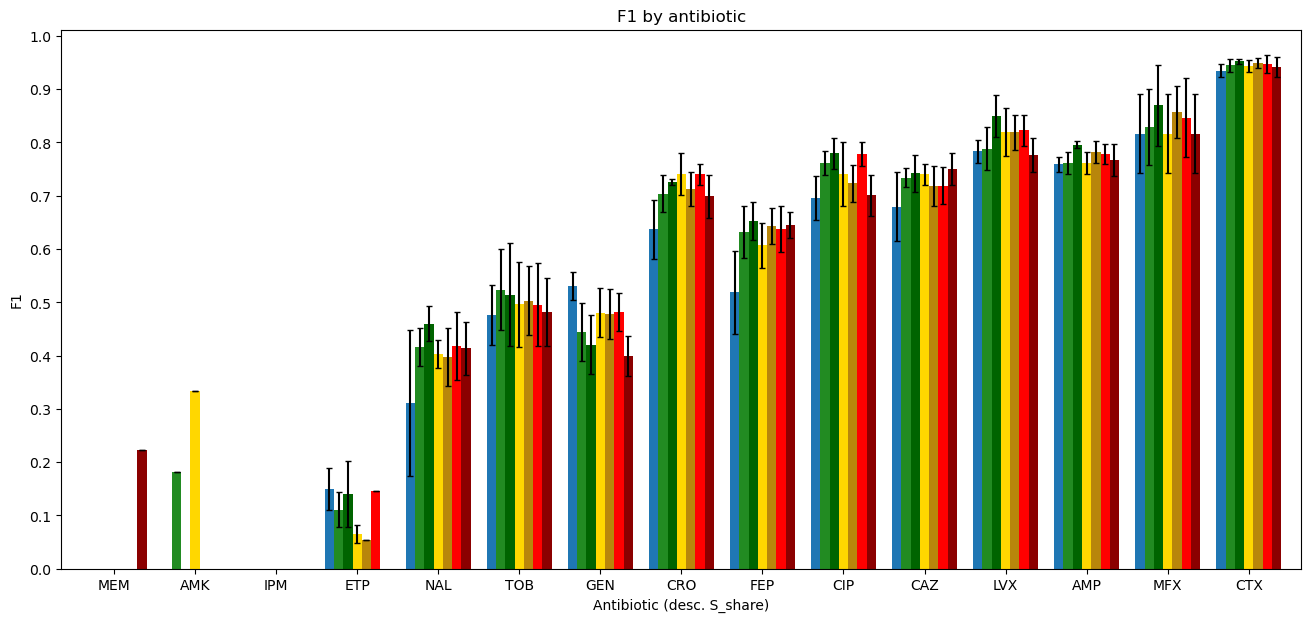

In [48]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.01', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
    savepath=os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_F1_by_ab_0.01.eps') if save_results else None,
)

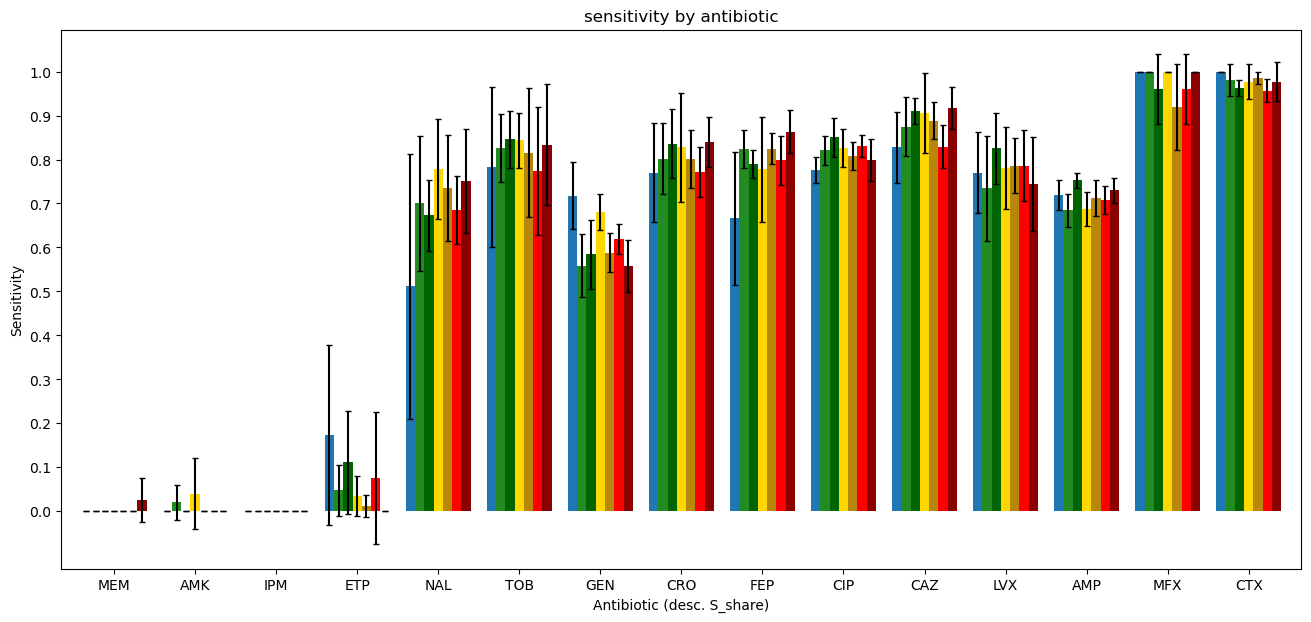

In [49]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

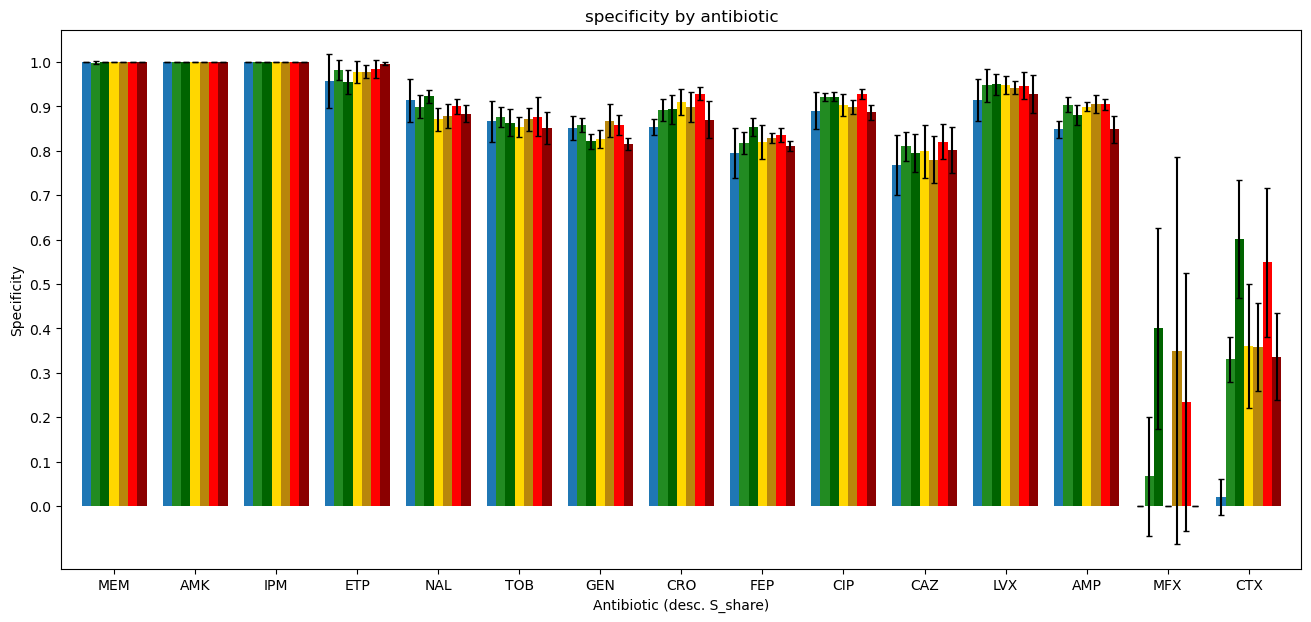

In [50]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

5%

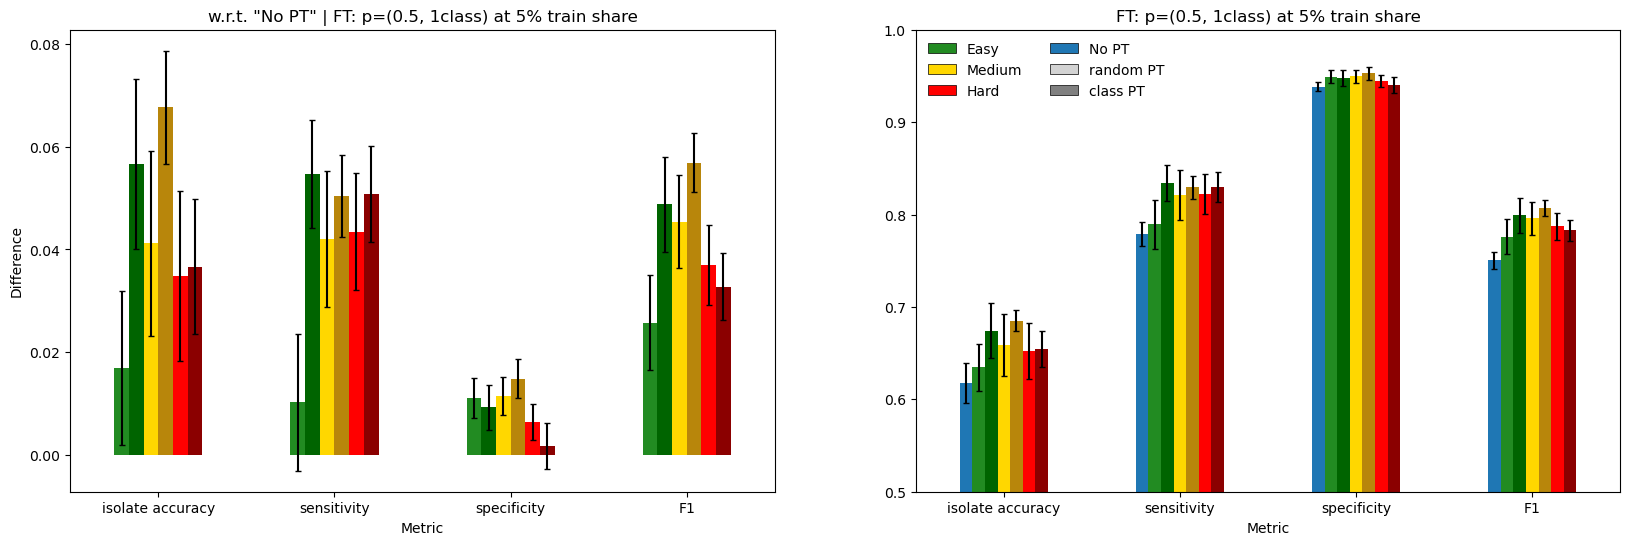

In [51]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.05', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 5% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 5% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.05.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

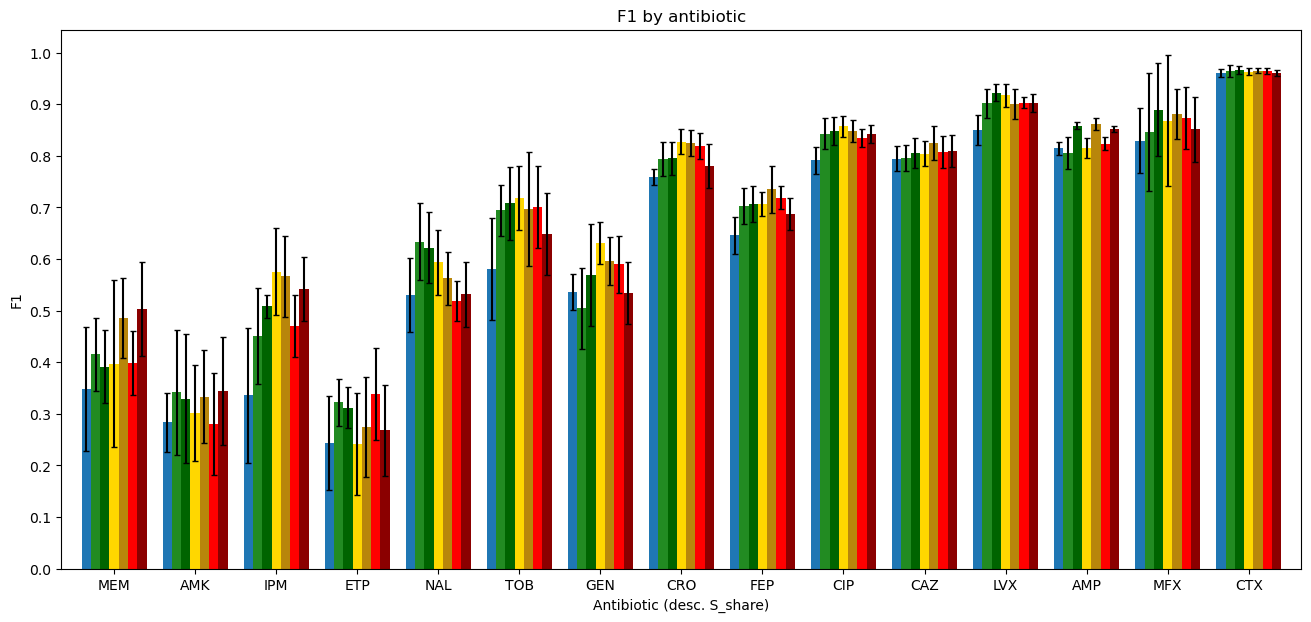

In [52]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.05', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

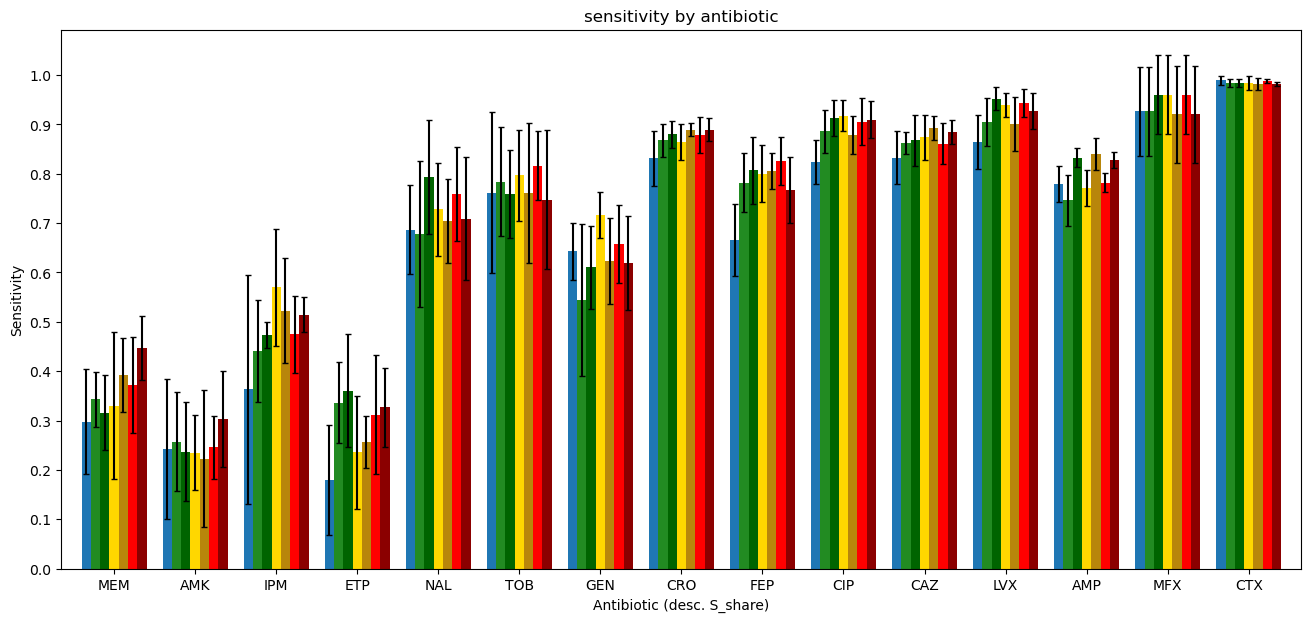

In [53]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

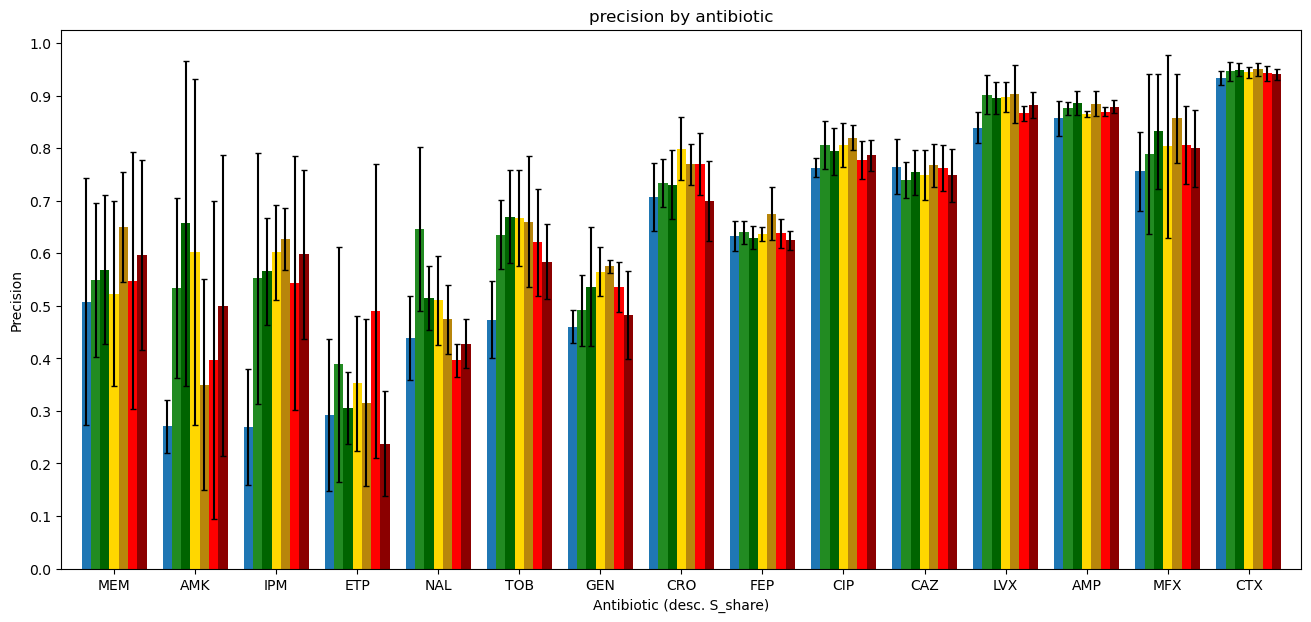

In [54]:
plot_metric_by_ab(
    df_CV_ab,
    metric='precision',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

10%

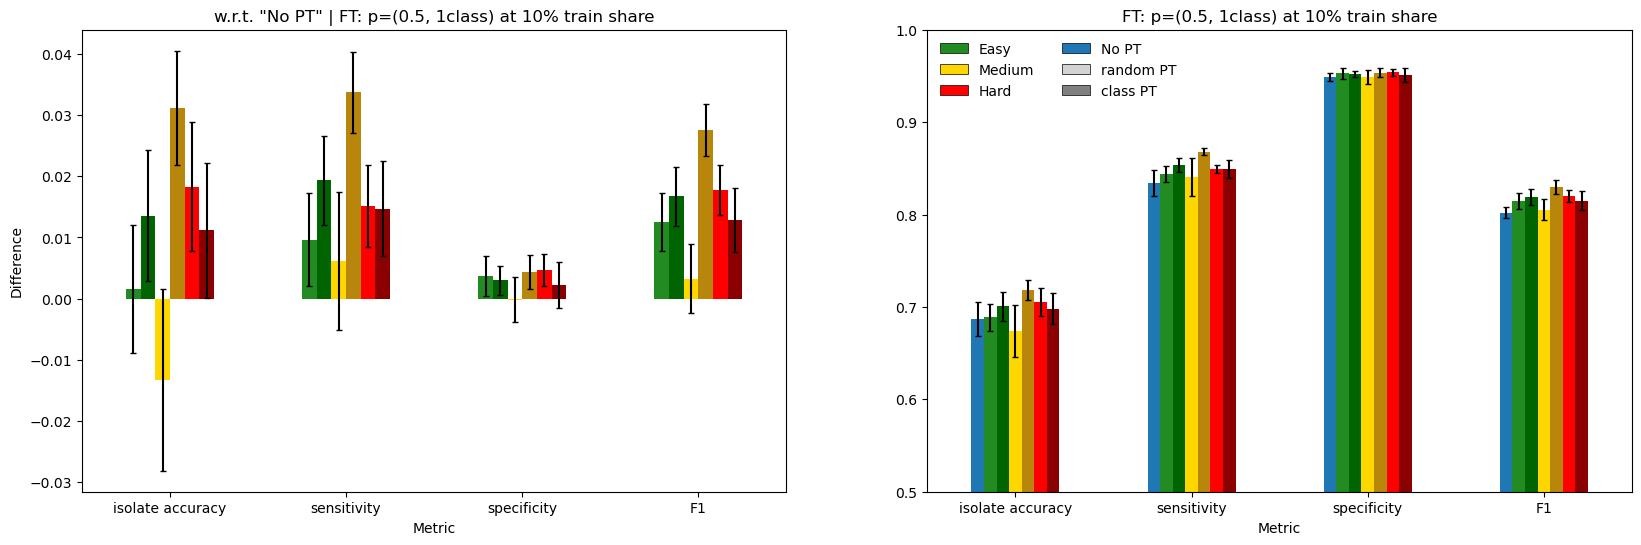

In [55]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.1', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 10% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 10% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.1.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

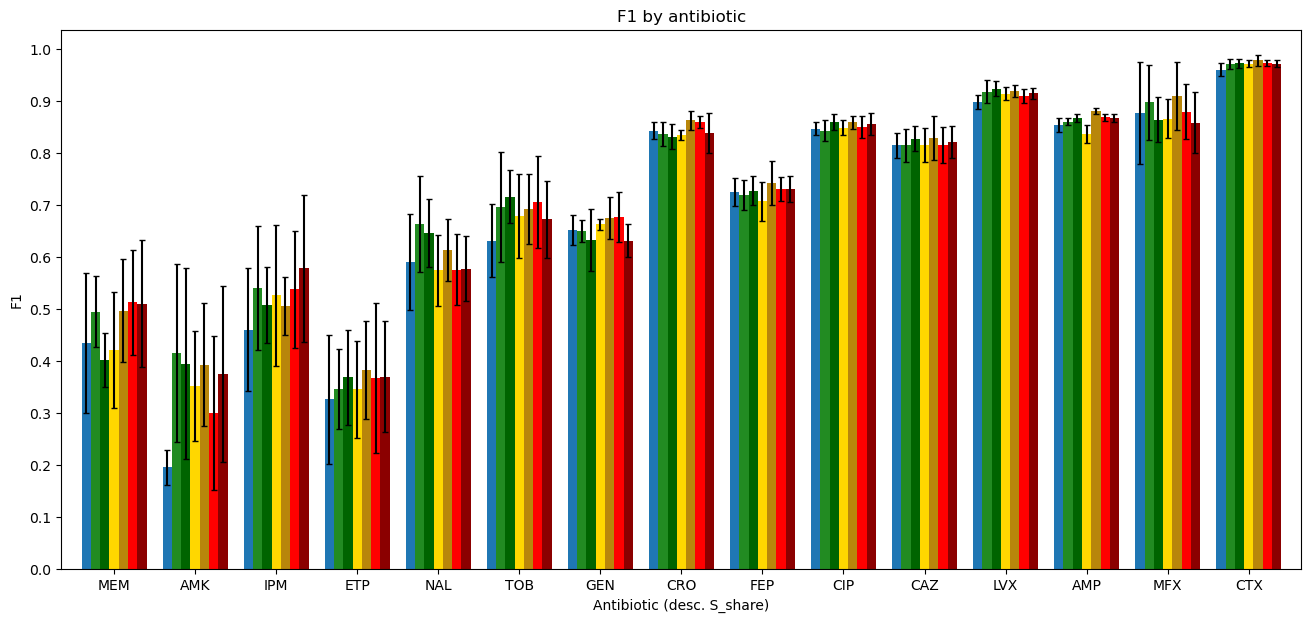

In [56]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.1', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

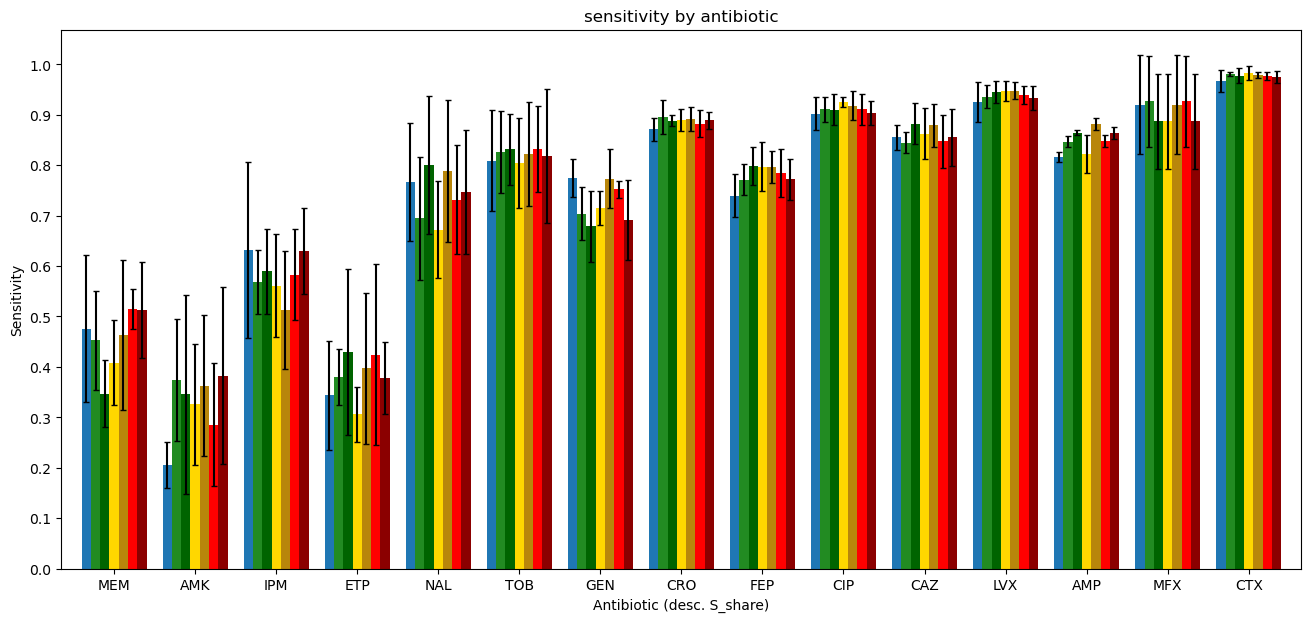

In [57]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

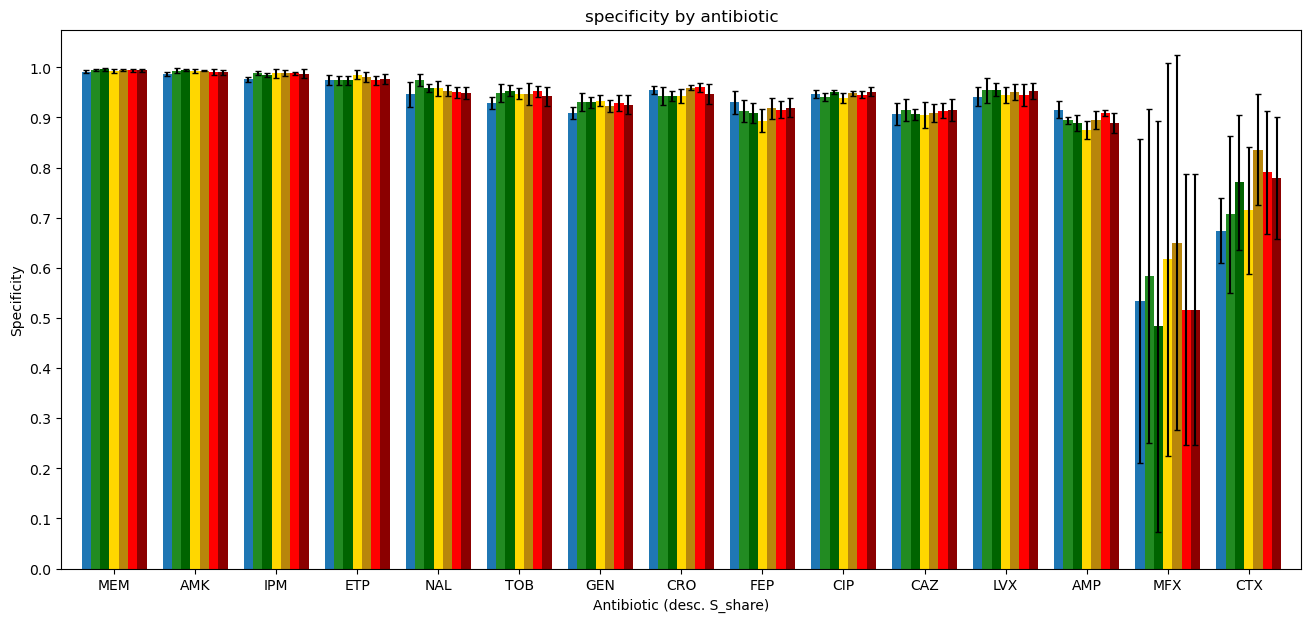

In [58]:
plot_metric_by_ab(
    df_CV_ab,
    metric='specificity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

30%

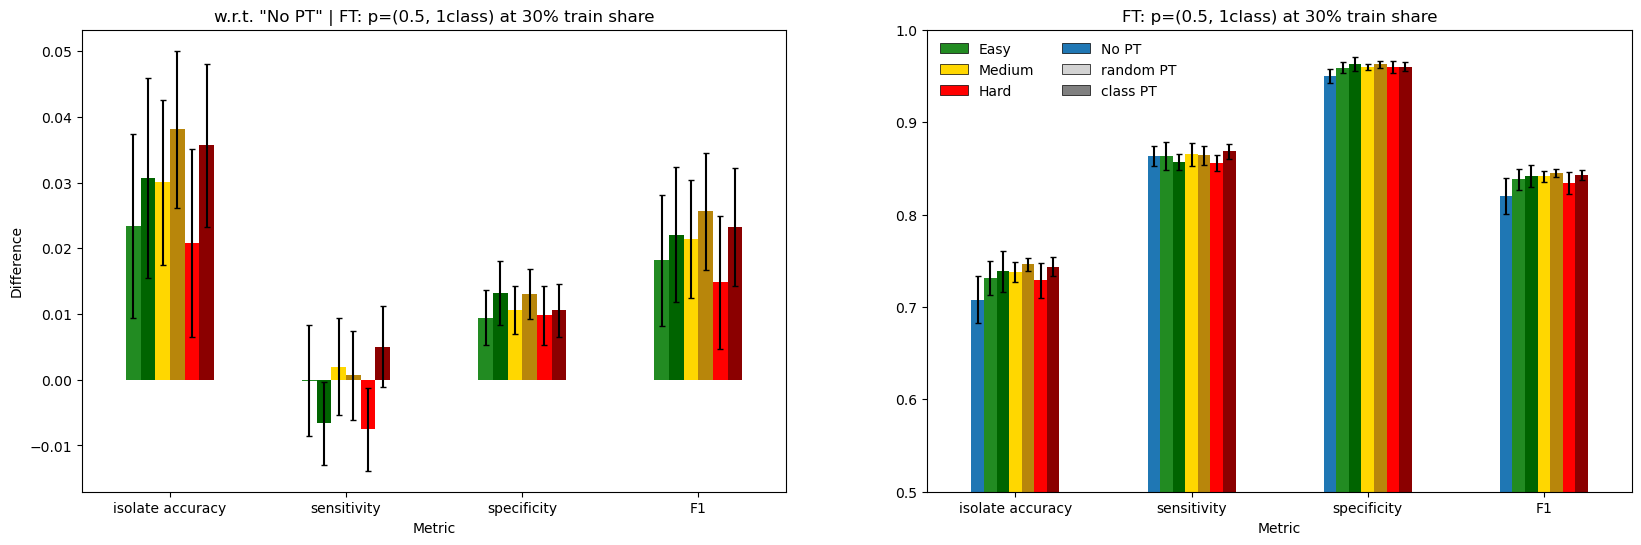

In [59]:
df_CV, df_diff = load_and_create_abs_and_rel_diff_df(train_params, '0.3', exp_folder=exp_folder, include_auc=False)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

ax1 = axes[0]  # Select the first subplot
df_diff.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax1, legend=False, capsize=2, ecolor='k', color=colors[1:])
ax1.set_title('w.r.t. "No PT" | FT: p=('+train_params.replace('_', ', ')+') at 30% train share')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Difference')

ax2 = axes[1]  # Select the second subplot
df_CV.loc[metrics].plot(kind='bar', y='avg', yerr='std', rot=0, ax=ax2, capsize=2, ecolor='k', color=colors)
noPT = Rectangle((0,0),1,1,fc='tab:blue', edgecolor='k', linewidth=0.5)
easyPT = Rectangle((0,0),1,1,fc='forestgreen', edgecolor='k', linewidth=0.5)
mediumPT = Rectangle((0,0),1,1,fc='gold', edgecolor='k', linewidth=0.5)
hardPT = Rectangle((0,0),1,1,fc='red', edgecolor='k', linewidth=0.5)
pt = Rectangle((0,0),1,1,fc='lightgrey', edgecolor='k', linewidth=0.5)
cpt = Rectangle((0,0),1,1,fc='dimgray', edgecolor='k', linewidth=0.5)
ax2.legend(
    handles=[easyPT, mediumPT, hardPT, noPT, pt, cpt],
    labels=['Easy', 'Medium', 'Hard', 'No PT', 'random PT', 'class PT'],
    ncols=2,
    framealpha=0,
)
ax2.set_ylim(0.5, 1)
ax2.set_xlabel('Metric')
ax2.set_title('FT: p=('+train_params.replace('_', ', ')+') at 30% train share')

savepath = os.path.join(BASE_DIR, 'results', 'figures', 'M_02_28', 'randFT_diff_0.3.eps')
plt.savefig(savepath, bbox_inches='tight', dpi=300, transparent=True) if save_results else None
plt.show()

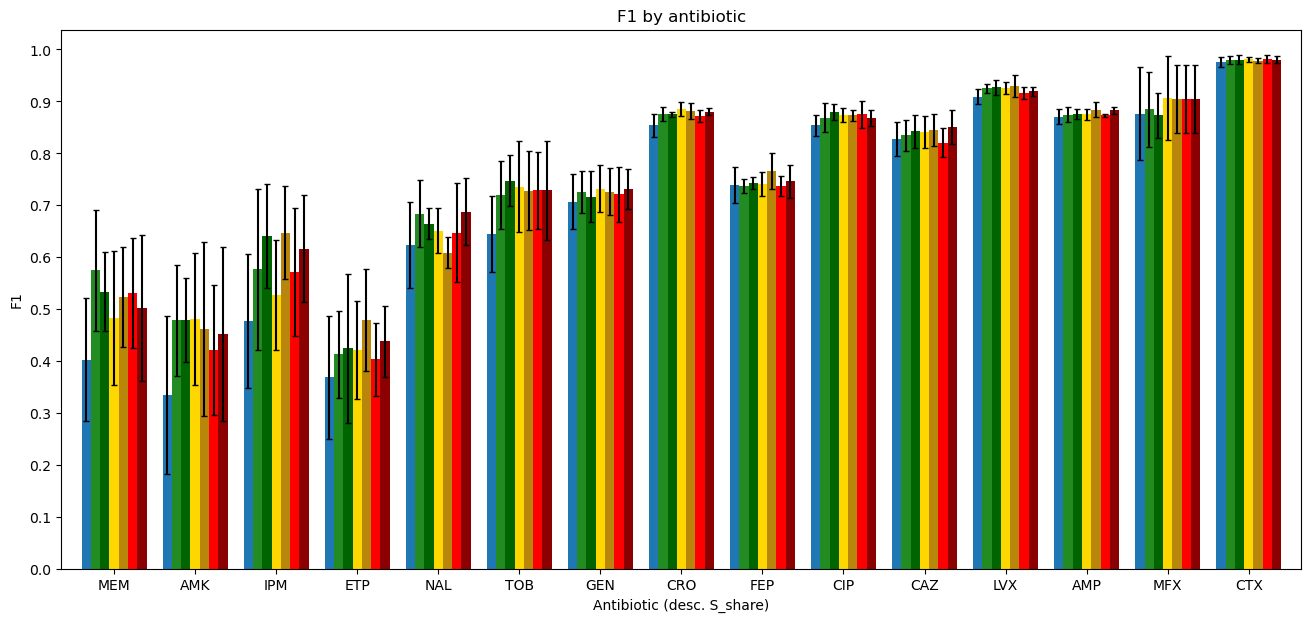

In [60]:
df_CV_ab = load_and_create_ab_df(train_params, train_share='0.3', exp_folder=exp_folder, include_auc=False)
plot_metric_by_ab(
    df_CV_ab,
    metric='F1',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)

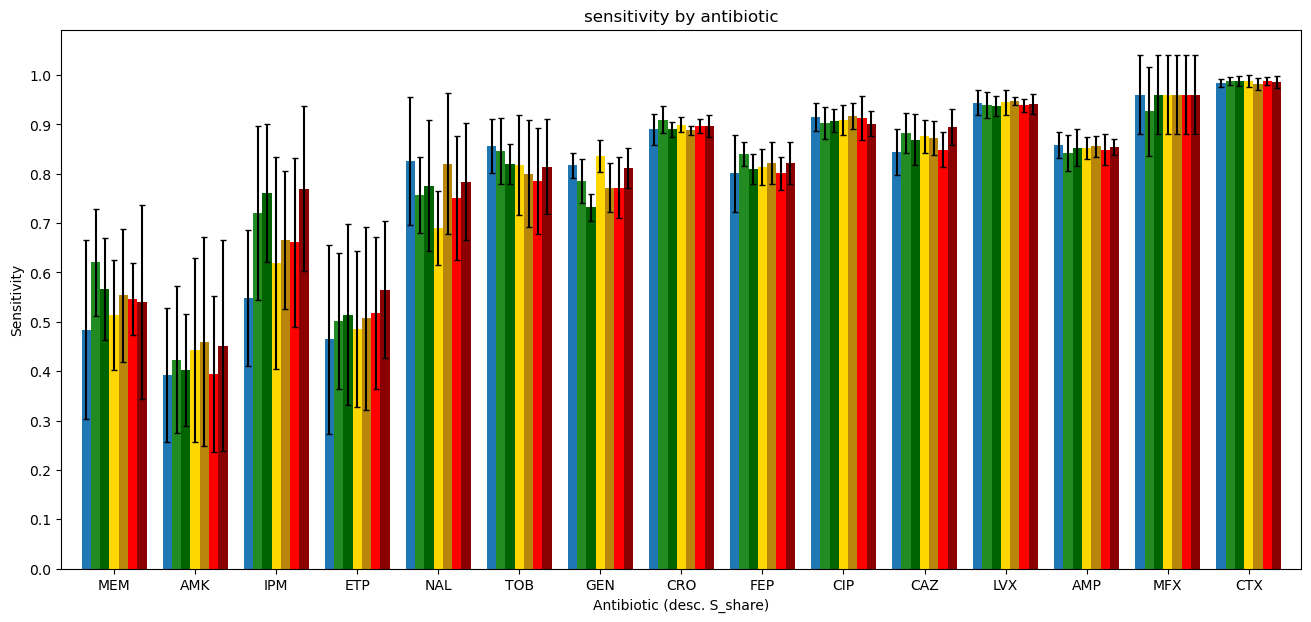

In [61]:
plot_metric_by_ab(
    df_CV_ab,
    metric='sensitivity',
    bar_width=0.8,
    figsize=ab_figsize,
    sort_by_desc='S_share',
    use_legend=False,
)